In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
# The theoretical capacity of the cells modelled by Marinescu-type 0D models are given
# by cth = (3 * ne * F * S8 / (ns8 * Ms) + ne * F * S4/ (ns4 * Ms)) / 3600

Ms = 32
n4 = 4
F = 9.649e4
S8_initial = 2.6730
ns8 = 8
S4_initial = 0.0128
ns4 = 4
cth = ((3 * n4 * F * S8_initial / (ns8 * Ms)) + (n4 * F * S4_initial / (ns4 * Ms))) / 3600

print("Theoretical Capacity = %2.2f Ah" %(cth))

Theoretical Capacity = 3.37 Ah


In [3]:
# let us take the theoretical capacity down to the level of the 0.211 Ah battery from Hunt.

# define the initial values in grams of various species
S8_initial_g = 2.6730
S4_initial_g = 0.0128
S2_initial_g = 4.3321e-6
S1_initial_g = 1.6321e-6
Sp_initial_g = 2.7e-06

# the total active material mass
m_s = S8_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168

# check that the new cell capacity is same as Hunt's
cth = ((3 * n4 * F * S8_initial_frac*m_s_hunt / (ns8 * Ms)) + (n4 * F * S4_initial_frac*m_s_hunt / (ns4 * Ms))) / 3600
print("Theoretical Capacity = %2.3f Ah" %(cth))

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

Theoretical Capacity = 0.211 Ah


In [4]:
# let us now check the change in discharge profiles induced by 
# by capacity changes (all at the same C rate)

# instantiate models
model1 = pybamm.lithium_sulfur.MarinescuEtAl2016()
model2 = pybamm.lithium_sulfur.MarinescuEtAl2016()

# set up the parameters and initial conditions
current1 = current
current2 = current*10

params1 = model1.default_parameter_values
params1.update(
    {
        "Current function [A]": current1,
        "Initial Condition for S8 ion [g]": S8_initial_frac*m_s_hunt,
        "Initial Condition for S4 ion [g]": S4_initial_frac*m_s_hunt,
        "Initial Condition for S2 ion [g]": S2_initial_frac*m_s_hunt,
        "Initial Condition for S ion [g]": S1_initial_frac*m_s_hunt,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_frac*m_s_hunt,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
    }
)

params2 = model2.default_parameter_values
params2.update(
    {
        "Current function [A]": current2,
        "Initial Condition for S8 ion [g]": S8_initial_frac*m_s_hunt*10,
        "Initial Condition for S4 ion [g]": S4_initial_frac*m_s_hunt*10,
        "Initial Condition for S2 ion [g]": S2_initial_frac*m_s_hunt*10,
        "Initial Condition for S ion [g]": S1_initial_frac*m_s_hunt*10,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_frac*m_s_hunt*10,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
    }
)




In [6]:
# run the simulations
sim1 = pybamm.Simulation(
    model1,
    parameter_values=params1,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)

hours= 10/2
time_in_seconds1 = hours*3600
sim1.solve(np.linspace(0, time_in_seconds1, 100000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

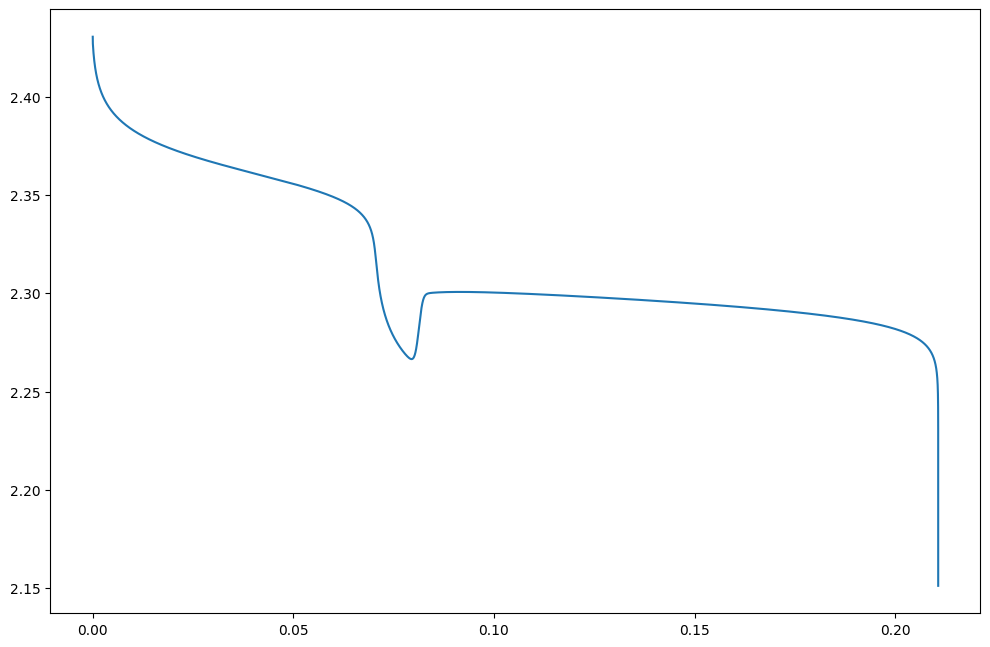

In [7]:
# plot the output
voltage1 = sim1.solution['Terminal voltage [V]'].entries
Ah1 = current*sim1.solution.t/3600
plt.plot(Ah1, voltage1) 

In [8]:
# run the simulations
sim2 = pybamm.Simulation(
    model2,
    parameter_values=params2,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)

hours = 10/2
time_in_seconds2 = hours*3600 - 100 # failure at 10 hours exactly
sim2.solve(np.linspace(0, time_in_seconds2, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.0311009 and

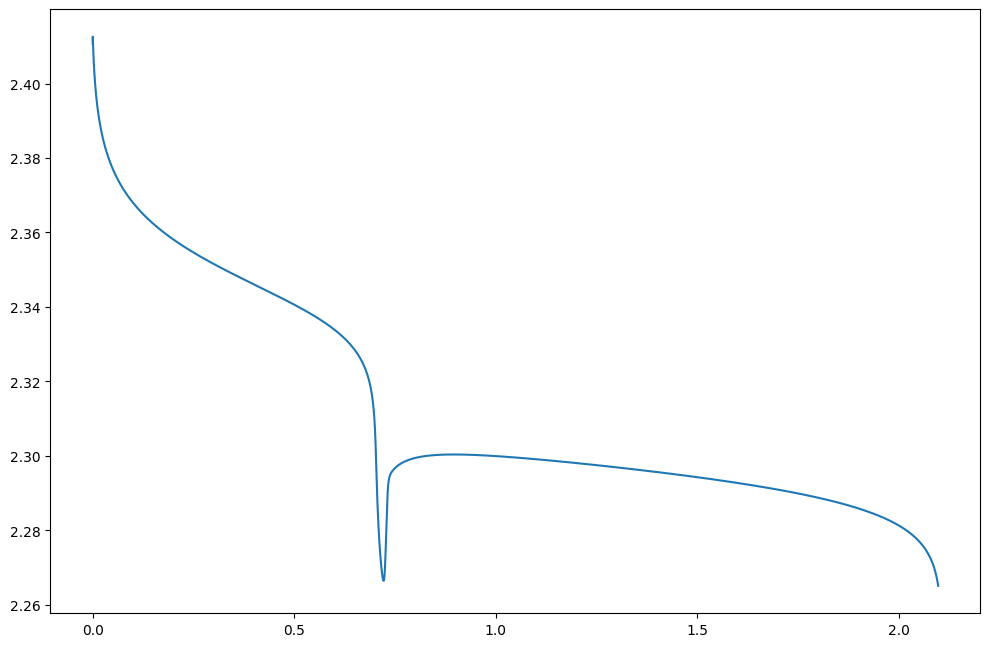

In [9]:
# plot the output
voltage2 = sim2.solution['Terminal voltage [V]'].entries
Ah2 = current2*sim2.solution.t/3600
plt.plot(Ah2, voltage2)

2020-11-30 17:10:17,152 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-11-30 17:10:17,152 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


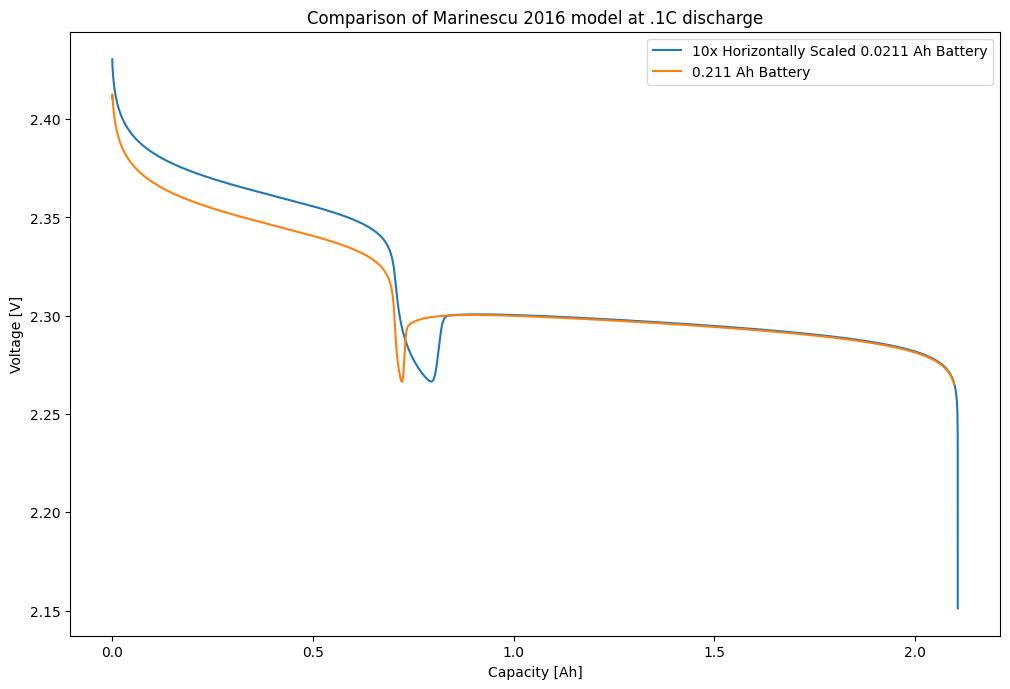

In [10]:
# comparison

plt.plot(Ah1*10, voltage1) # adjusting to scale with second battery
plt.plot(Ah2, voltage2)

plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(["10x Horizontally Scaled 0.0211 Ah Battery", "0.211 Ah Battery"])
plt.title("Comparison of Marinescu 2016 model at .1C discharge")
plt.savefig("Battery Capacity Comparison.eps")

In [4]:
def marinescu2016_discharge_function(temperature):
    model = pybamm.lithium_sulfur.MarinescuEtAl2016()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial_frac*m_s_hunt,
        "Initial Condition for S4 ion [g]": S4_initial_frac*m_s_hunt,
        "Initial Condition for S2 ion [g]": S2_initial_frac*m_s_hunt,
        "Initial Condition for S ion [g]": S1_initial_frac*m_s_hunt,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_frac*m_s_hunt,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : temperature
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    print("Starting temperature %f" %(temperature))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            voltage = sim.solution['Terminal voltage [V]'].entries
            Ah = current*sim.solution.t/3600
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            
            return Ah, voltage, temperature - 298 + 24.85, S8, S4, S2, S1, Sp
            
            break
        except:
            pass
    return None    
    

In [5]:
temp_array = [298 +i*10 for i in range(-4,5)]

data = Parallel(n_jobs=-1)(delayed(marinescu2016_discharge_function)(i) for i in temp_array)

2020-12-01 15:08:21,675 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-01 15:08:21,676 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


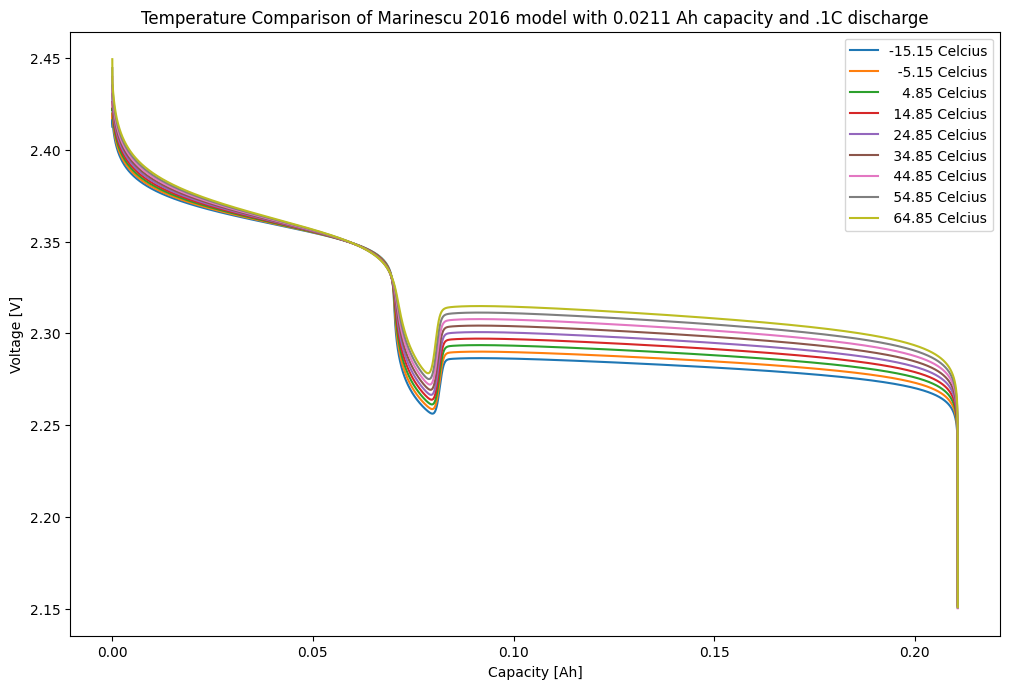

In [6]:
temp_legend = []
for sub_data in data:
    plt.plot(sub_data[0],sub_data[1])
    if sub_data[2] < -10:
        temp_legend.append("%2.2f Celcius" %(sub_data[2]))
    elif sub_data[2] < 0:
        temp_legend.append("  %2.2f Celcius" %(sub_data[2]))
    elif sub_data[2] < 10:
        temp_legend.append("   %2.2f Celcius" %(sub_data[2]))
    else:
        temp_legend.append(" %2.2f Celcius" %(sub_data[2]))
        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(temp_legend)
plt.title("Temperature Comparison of Marinescu 2016 model with 0.0211 Ah capacity and .1C discharge")
plt.savefig("Marinescu 2016 Discharge Temp Comparison.eps")

In [8]:
filename = 'Marinsecu_2016_Discharge'
outfile = open(filename,'wb')
pickle.dump(data,outfile)
outfile.close()

In [5]:
filename = 'Marinsecu_2016_Discharge'
infile = open(filename,'rb')
data = pickle.load(infile)
infile.close()

In [12]:
hours = 10
time_in_seconds = hours*3600
current = -0.0211

def marinescu2016_charge_function(i):
    
    # get temperature
    sub_data_specific = data[i]
    temperature = sub_data_specific[2] + 298 - 24.85
    
    # take the initial condition from the T = 298K discharge simulation
    ref = -1
    sub_data = data[4]
    V_initial = sub_data[1][ref]
    S8_initial = sub_data[3][ref]
    S4_initial = sub_data[4][ref]
    S2_initial = sub_data[5][ref]
    S1_initial = sub_data[6][ref]
    Sp_initial = sub_data[7][ref]
    
    
    model = pybamm.lithium_sulfur.MarinescuEtAl2016()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : temperature
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    print("Starting temperature %f" %(temperature))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            voltage = sim.solution['Terminal voltage [V]'].entries
            Ah = -current*sim.solution.t/3600
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            
            return Ah, voltage, temperature - 298 + 24.85, S8, S4, S2, S1, Sp
            
            break
        except:
            pass
        
    

In [46]:
i = 0
sub_data = data[i]
temperature = sub_data[2] + 298 - 24.85
ref = -1000
V_initial = sub_data[1][ref]
S8_initial = sub_data[3][ref]
S4_initial = sub_data[4][ref]
S2_initial = sub_data[5][ref]
S1_initial = sub_data[6][ref]
Sp_initial = sub_data[7][ref]
hours = 10
time_in_seconds = hours*3600


model = pybamm.lithium_sulfur.MarinescuEtAl2016()

params = model.default_parameter_values
params.update(
    {
    "Current function [A]": current,
    "Initial Condition for S8 ion [g]": S8_initial,
    "Initial Condition for S4 ion [g]": S4_initial,
    "Initial Condition for S2 ion [g]": S2_initial,
    "Initial Condition for S ion [g]": S1_initial,
    "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
    "Initial Condition for Terminal Voltage [V]": V_initial,
    "Shuttle rate coefficient during charge [s-1]": 0.0002,
    "Shuttle rate coefficient during discharge [s-1]": 0.0,
    "Reference temperature [K]" : temperature
    }
)
# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
print("Starting temperature %.0f" %(temperature))
for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
    print("trying time %.0f" %j)
    try:
        # simulate
        sim.solve(np.linspace(0, j,100000))
        # extract data
        voltage = sim.solution['Terminal voltage [V]'].entries
        Ah = current*sim.solution.t/3600
        S8 = sim.solution["S8 [g]"].entries
        S4 = sim.solution["S4 [g]"].entries
        S2 = sim.solution["S2 [g]"].entries
        S1 = sim.solution["S [g]"].entries
        Sp = sim.solution["Precipitated Sulfur [g]"].entries

        break
    except:
        pass

Starting temperature 258
trying time 36000


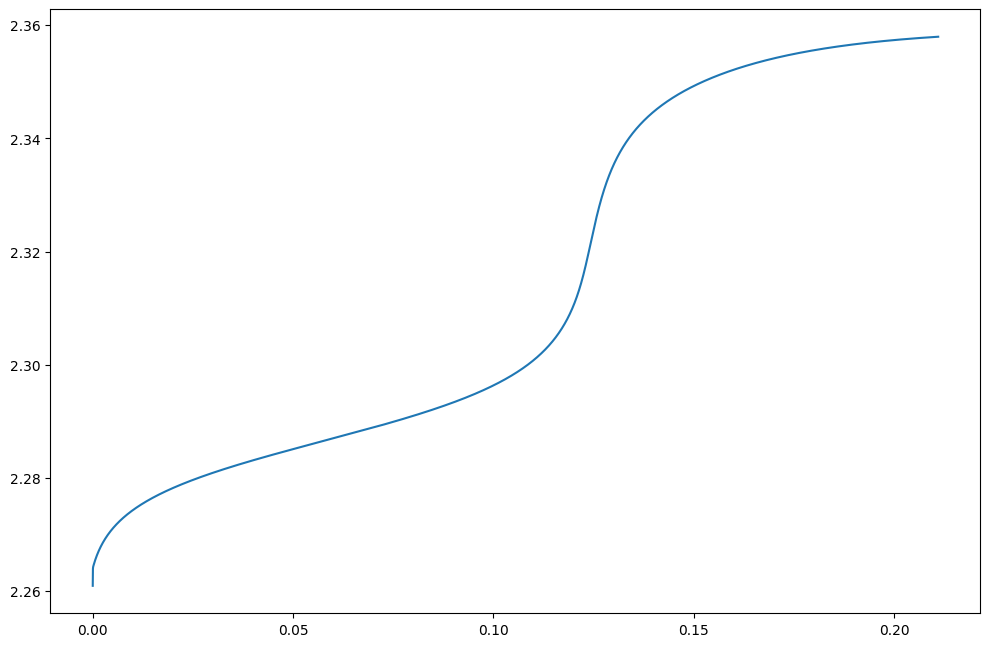

In [49]:
plt.plot(-Ah,voltage)

In [31]:
i = 8
sub_data = data[i]
temperature = sub_data[2] + 298 - 24.85
ref = -1000
V_initial = sub_data[1][ref]
S8_initial = sub_data[3][ref]
S4_initial = sub_data[4][ref]
S2_initial = sub_data[5][ref]
S1_initial = sub_data[6][ref]
Sp_initial = sub_data[7][ref]
hours = 10
time_in_seconds = hours*3600


model = pybamm.lithium_sulfur.MarinescuEtAl2016()

params = model.default_parameter_values
params.update(
    {
    "Current function [A]": -current/2,
    "Initial Condition for S8 ion [g]": S8_initial,
    "Initial Condition for S4 ion [g]": S4_initial,
    "Initial Condition for S2 ion [g]": S2_initial,
    "Initial Condition for S ion [g]": S1_initial,
    "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
    "Initial Condition for Terminal Voltage [V]": V_initial,
    "Shuttle rate coefficient during charge [s-1]": 0.0002,
    "Shuttle rate coefficient during discharge [s-1]": 0.0,
    "Reference temperature [K]" : temperature
    }
)
# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
print("Starting temperature %.0f" %(temperature))
for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
    print("trying time %.0f" %j)
    try:
        # simulate
        sim.solve(np.linspace(0, j,100000))
        # extract data
        voltage = sim.solution['Terminal voltage [V]'].entries
        Ah = current*sim.solution.t/3600
        S8 = sim.solution["S8 [g]"].entries
        S4 = sim.solution["S4 [g]"].entries
        S2 = sim.solution["S2 [g]"].entries
        S1 = sim.solution["S [g]"].entries
        Sp = sim.solution["Precipitated Sulfur [g]"].entries

        break
    except:
        pass

Starting temperature 338
trying time 36000


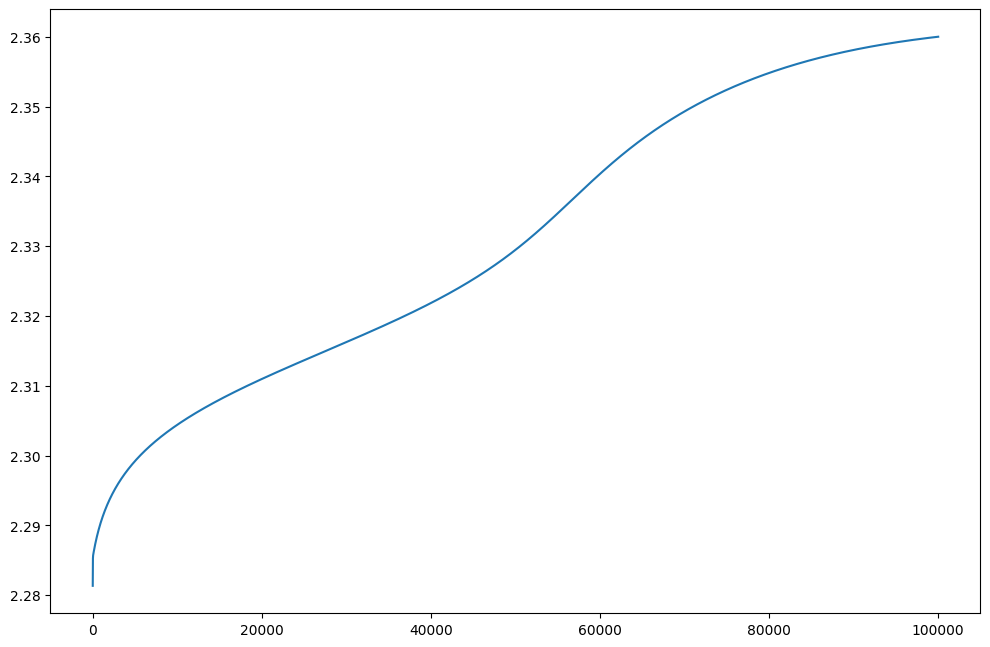

In [32]:
plt.plot(voltage)

In [7]:
charge_2016_data = Parallel(n_jobs=-1)(delayed(marinescu2016_charge_function)(i) for i in range(0,len(data)))

2020-12-01 15:41:52,019 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-01 15:41:52,020 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


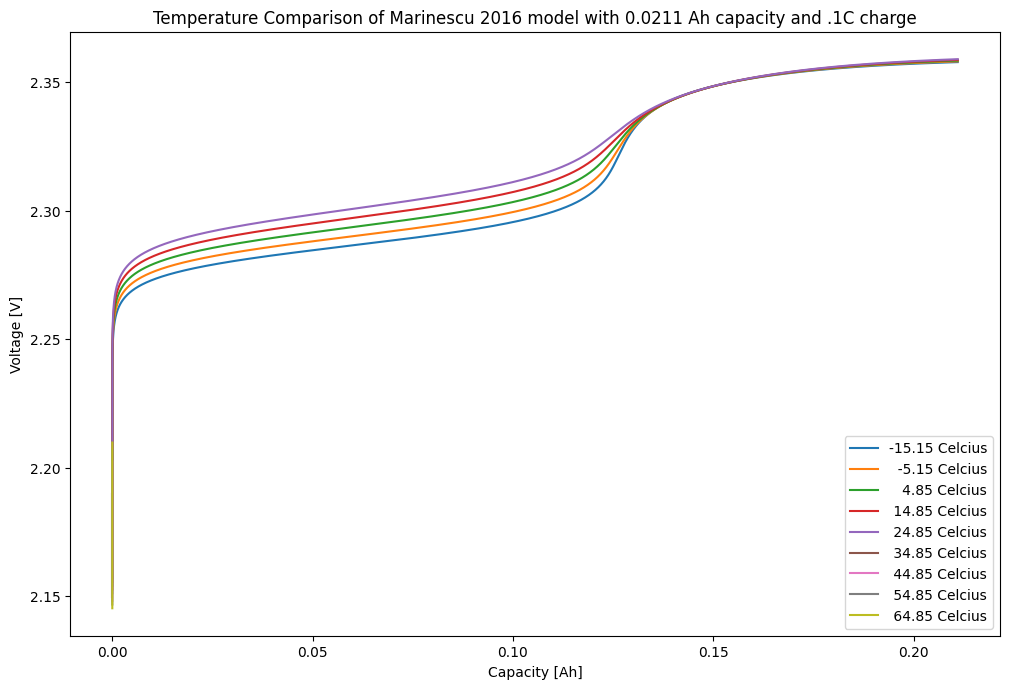

In [10]:
temp_legend = []
for sub_data in charge_2016_data:
    try:
        plt.plot(-sub_data[0],sub_data[1])
        if sub_data[2] < -10:
            temp_legend.append("%2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 0:
            temp_legend.append("  %2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 10:
            temp_legend.append("   %2.2f Celcius" %(sub_data[2]))
        else:
            temp_legend.append(" %2.2f Celcius" %(sub_data[2]))
    except:
        pass
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(temp_legend)
plt.title("Temperature Comparison of Marinescu 2016 model with 0.0211 Ah capacity and .1C charge")
plt.savefig("Marinescu 2016 Charge Temp Comparison.eps")

In [11]:
filename = 'Marinsecu_2016_Charge'
outfile = open(filename,'wb')
pickle.dump(charge_2016_data,outfile)
outfile.close()

Starting temperature 298.000000
trying time 72000.000000


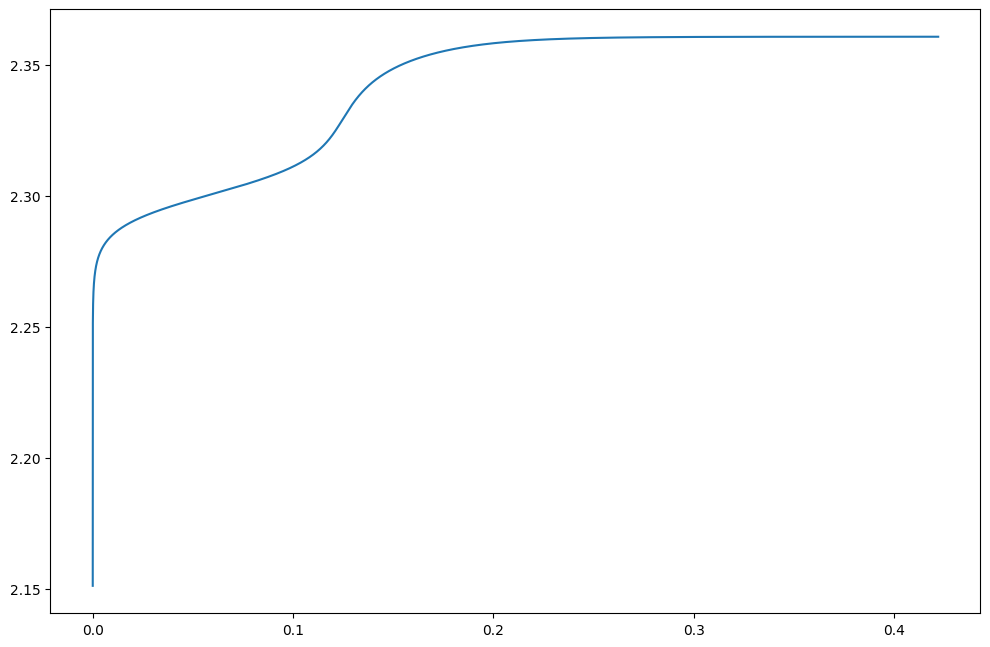

In [19]:
hours = 20
time_in_seconds = hours*3600
current = -0.0211

single_run1 = marinescu2016_charge_function(4)

Ah1 = single_run1[0]
voltage1 = single_run1[1]

plt.plot(Ah1,voltage1)

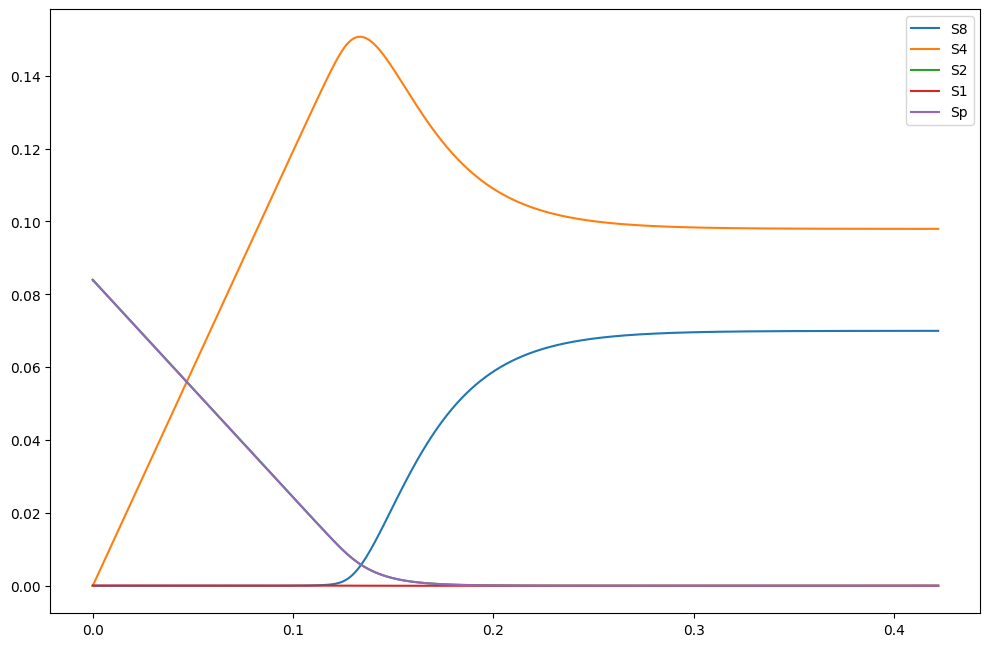

In [23]:
S8_1 = single_run1[3]
S4_1 = single_run1[4]
S2_1 = single_run1[5]
S1_1 = single_run1[6]
Sp_1 = single_run1[7]

plt.plot(Ah1,S8_1)
plt.plot(Ah1,S4_1)
plt.plot(Ah1,S2_1)
plt.plot(Ah1,S1_1)
plt.plot(Ah1,Sp_1)

plt.legend(["S8","S4","S2","S1","Sp"])

Starting temperature 298.000000
trying time 43200.000000


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 2595.13 and h = 8.6302e-13, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../

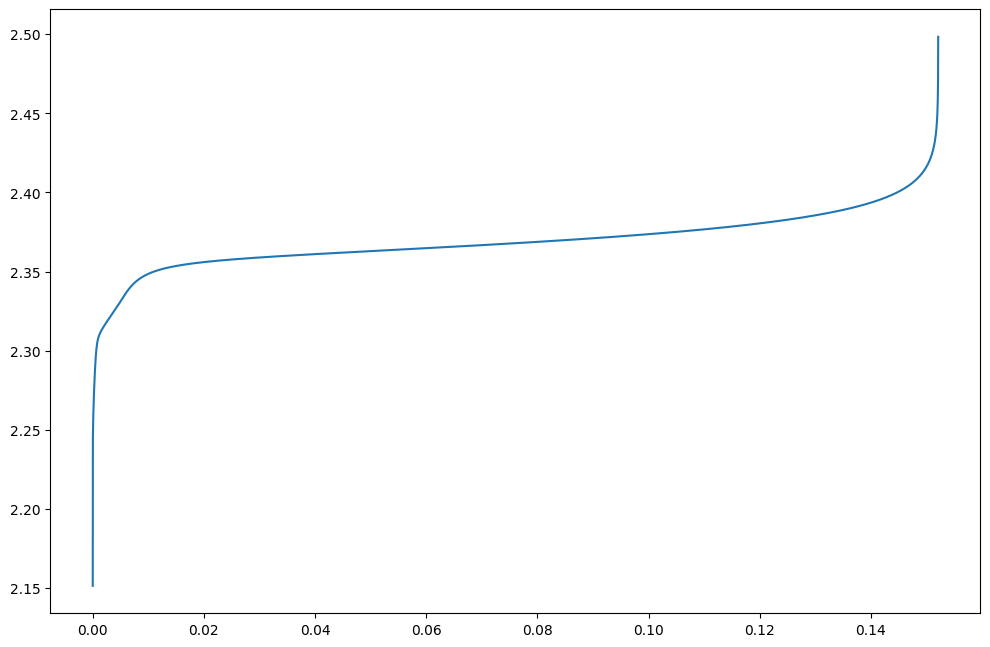

In [14]:
hours = 12
time_in_seconds = hours*3600
current = -0.211

single_run2 = marinescu2016_charge_function(4)

Ah2 = single_run2[0]
voltage2 = single_run2[1]

plt.plot(Ah,voltage)

In [24]:
hours = 12
time_in_seconds = hours*3600
current = -0.211

charge_2016_data = Parallel(n_jobs=-1)(delayed(marinescu2016_charge_function)(i) for i in range(0,len(data)))

2020-12-01 16:27:17,691 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-01 16:27:17,692 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


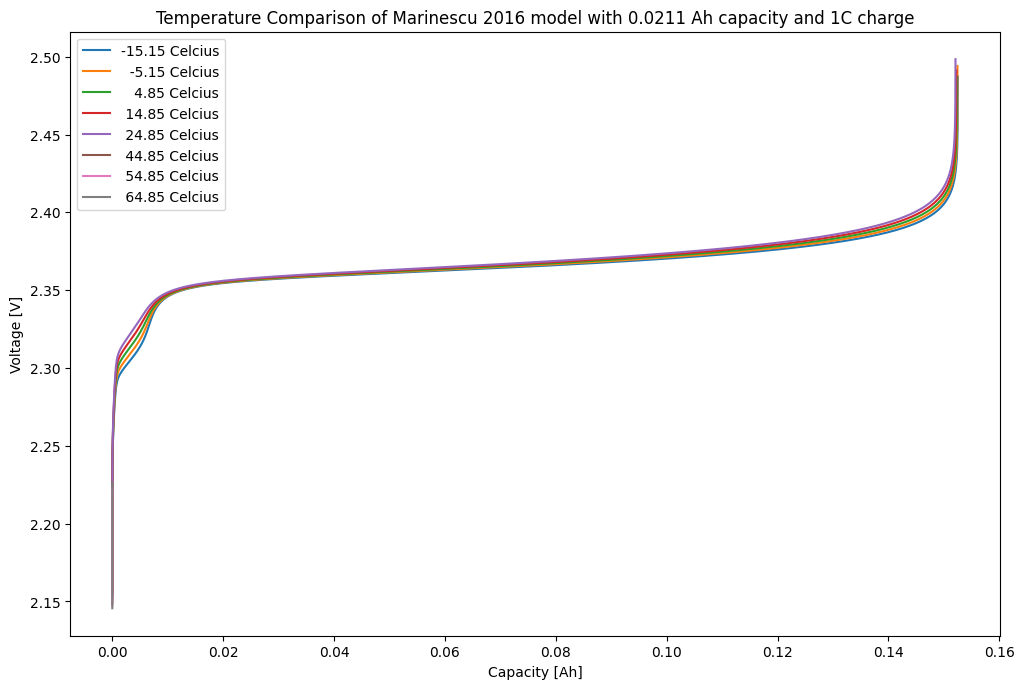

In [26]:
temp_legend = []
for sub_data in charge_2016_data:
    try:
        plt.plot(sub_data[0],sub_data[1])
        if sub_data[2] < -10:
            temp_legend.append("%2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 0:
            temp_legend.append("  %2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 10:
            temp_legend.append("   %2.2f Celcius" %(sub_data[2]))
        else:
            temp_legend.append(" %2.2f Celcius" %(sub_data[2]))
    except:
        pass
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(temp_legend)
plt.title("Temperature Comparison of Marinescu 2016 model with 0.0211 Ah capacity and 1C charge")
plt.savefig("Marinescu 2016 Charge Temp Comparison 1C.eps")

In [28]:
hours = 10
time_in_seconds = hours*3600
current = -0.0211

def marinescu2018_charge_function(i):
    
    # get specific temperature
    sub_data_specific = data[i]
    temperature = sub_data_specific[2] + 298 - 24.85
    
    # initiate all runs on same discharge species distribution
    sub_data = data[4]
    ref = -1000
    V_initial = sub_data[1][ref]
    S8_initial = sub_data[3][ref]
    S4_initial = sub_data[4][ref]
    S2_initial = sub_data[5][ref]
    S1_initial = sub_data[6][ref]
    Sp_initial = sub_data[7][ref]
    
    
    model = pybamm.lithium_sulfur.MarinescuEtAl2018()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : temperature
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    print("Starting temperature %f" %(temperature))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            voltage = sim.solution['Terminal voltage [V]'].entries
            Ah = -current*sim.solution.t/3600
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            
            return Ah, voltage, temperature - 298 + 24.85, S8, S4, S2, S1, Sp
            
            break
        except:
            pass
        
    

Starting temperature 298.000000
trying time 72000.000000


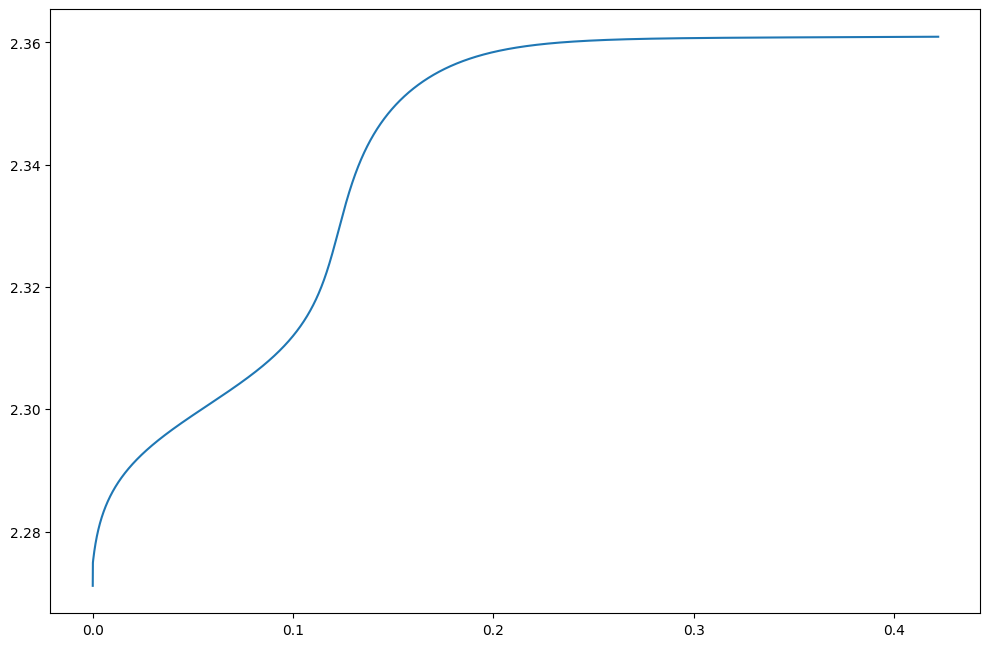

In [29]:
hours = 20
time_in_seconds = hours*3600
current = -0.0211

single_run1 = marinescu2018_charge_function(4)

Ah1 = single_run1[0]
voltage1 = single_run1[1]

plt.plot(Ah1,voltage1)

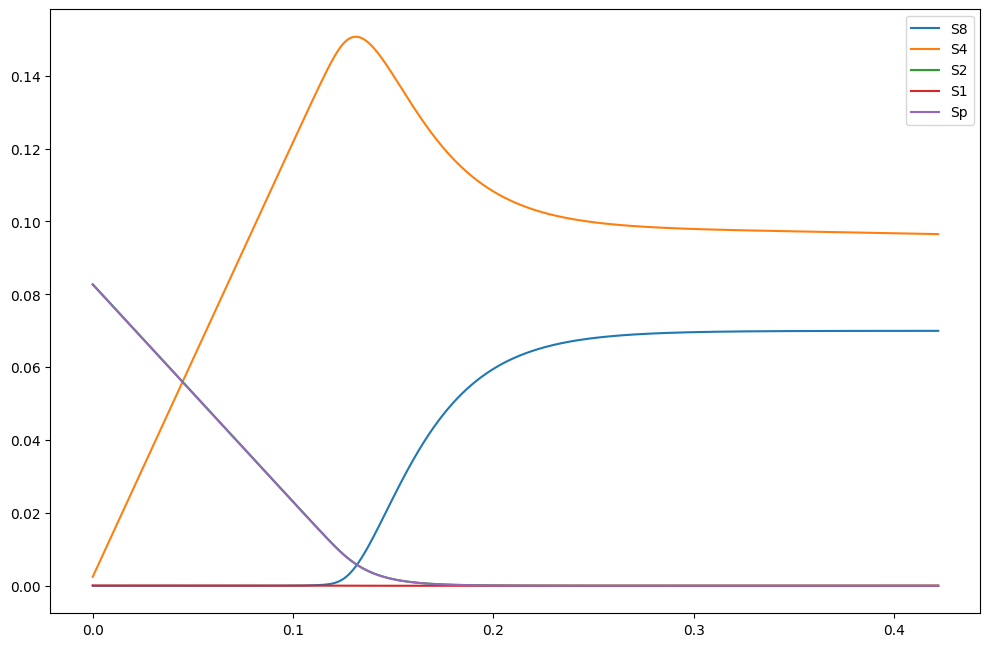

In [30]:
S8_1 = single_run1[3]
S4_1 = single_run1[4]
S2_1 = single_run1[5]
S1_1 = single_run1[6]
Sp_1 = single_run1[7]

plt.plot(Ah1,S8_1)
plt.plot(Ah1,S4_1)
plt.plot(Ah1,S2_1)
plt.plot(Ah1,S1_1)
plt.plot(Ah1,Sp_1)

plt.legend(["S8","S4","S2","S1","Sp"])

In [31]:
hours = 20
time_in_seconds = hours*3600
current = -0.211

single_run2 = marinescu2018_charge_function(4)

Starting temperature 298.000000
trying time 72000.000000


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 2559.6 and h = 1.49556e-11, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 4815.87 and h

trying time 71900.000000


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 2559.6 and h = 1.25588e-09, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 2559.6 and h

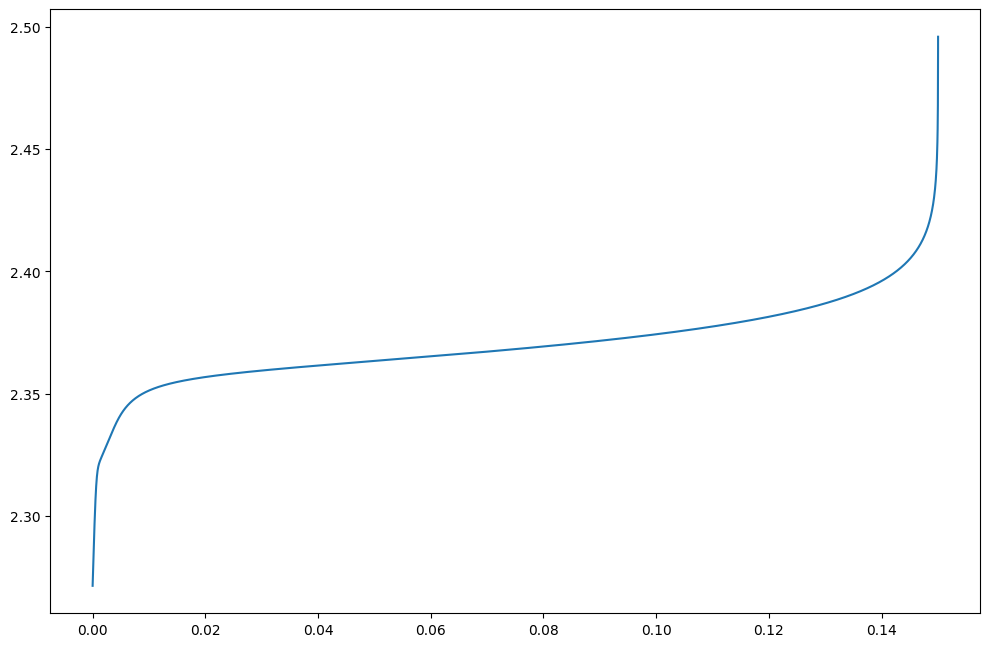

In [32]:
Ah2 = single_run2[0]
voltage2 = single_run2[1]

plt.plot(Ah2,voltage2)

In [62]:
i = 0
sub_data = data[i]
temperature = sub_data[2] + 298 - 24.85
ref = -1000
V_initial = sub_data[1][ref]
S8_initial = sub_data[3][ref]
S4_initial = sub_data[4][ref]
S2_initial = sub_data[5][ref]
S1_initial = sub_data[6][ref]
Sp_initial = sub_data[7][ref]
hours = 10
time_in_seconds = hours*3600


model = pybamm.lithium_sulfur.MarinescuEtAl2018()

params = model.default_parameter_values
params.update(
    {
    "Current function [A]": current,
    "Initial Condition for S8 ion [g]": S8_initial,
    "Initial Condition for S4 ion [g]": S4_initial,
    "Initial Condition for S2 ion [g]": S2_initial,
    "Initial Condition for S ion [g]": S1_initial,
    "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
    "Initial Condition for Terminal Voltage [V]": V_initial,
    "Shuttle rate coefficient during charge [s-1]": 0.0002,
    "Shuttle rate coefficient during discharge [s-1]": 0.0,
    "Reference temperature [K]" : temperature
    }
)
# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
print("Starting temperature %.0f" %(temperature))
for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
    print("trying time %.0f" %j)
    try:
        # simulate
        sim.solve(np.linspace(0, j,100000))
        # extract data
        voltage = sim.solution['Terminal voltage [V]'].entries
        Ah = -current*sim.solution.t/3600
        S8 = sim.solution["S8 [g]"].entries
        S4 = sim.solution["S4 [g]"].entries
        S2 = sim.solution["S2 [g]"].entries
        S1 = sim.solution["S [g]"].entries
        Sp = sim.solution["Precipitated Sulfur [g]"].entries

        break
    except:
        pass

Starting temperature 258
trying time 36000


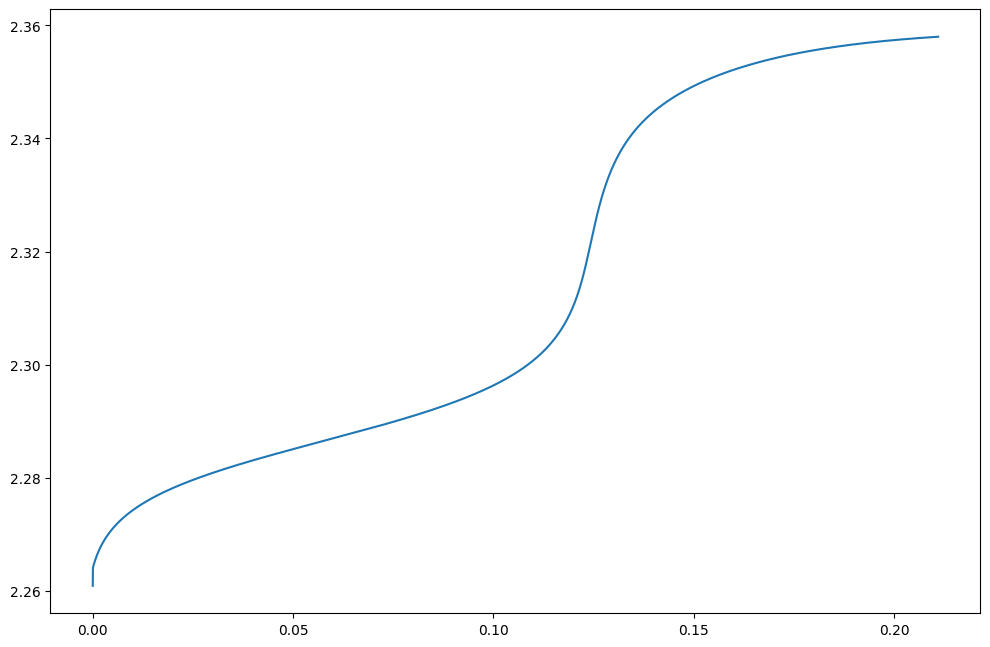

In [64]:
plt.plot(Ah,voltage)

In [73]:
charge_2018_data = Parallel(n_jobs=-1)(delayed(marinescu2018_charge_function)(i) for i in range(0,len(data)))

2020-12-01 11:35:27,950 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-01 11:35:27,950 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


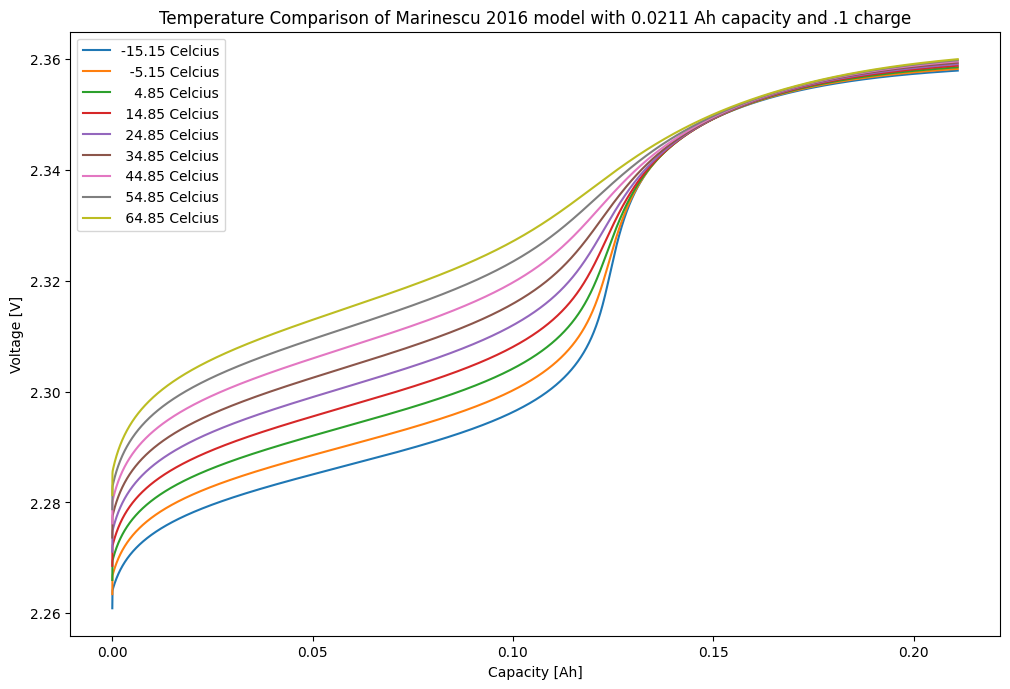

In [74]:
temp_legend = []
for sub_data in charge_2018_data:
    try:
        plt.plot(sub_data[0],sub_data[1])
        if sub_data[2] < -10:
            temp_legend.append("%2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 0:
            temp_legend.append("  %2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 10:
            temp_legend.append("   %2.2f Celcius" %(sub_data[2]))
        else:
            temp_legend.append(" %2.2f Celcius" %(sub_data[2]))
    except:
        pass
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(temp_legend)
plt.title("Temperature Comparison of Marinescu 2016 model with 0.0211 Ah capacity and .1 charge")
plt.savefig("Marinescu 2018 Charge Temp Comparison.eps")

In [40]:
hours = 10
time_in_seconds = hours*3600
current = -0.0211

def marinescu2019_charge_function(i):
    
    # specific temperature 
    sub_data_specific = data[i]
    temperature = sub_data_specific[2] + 298 - 24.85
    
    # use same initial condition
    sub_data = data[4]
    ref = -1000
    V_initial = sub_data[1][ref]
    S8_initial = sub_data[3][ref]
    S4_initial = sub_data[4][ref]
    S2_initial = sub_data[5][ref]
    S1_initial = sub_data[6][ref]
    Sp_initial = sub_data[7][ref]
    
    
    model = pybamm.lithium_sulfur.HuaEtAl2019()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : temperature
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    print("Starting temperature %f" %(temperature))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            voltage = sim.solution['Terminal voltage [V]'].entries
            Ah = -current*sim.solution.t/3600
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            Tc = sim.solution["Cell Temperature [K]"].entries
            
            return Ah, voltage, temperature - 298 + 24.85, S8, S4, S2, S1, Sp, Tc
            
            break
        except:
            pass
        
    

Starting temperature 298.000000
trying time 72000.000000


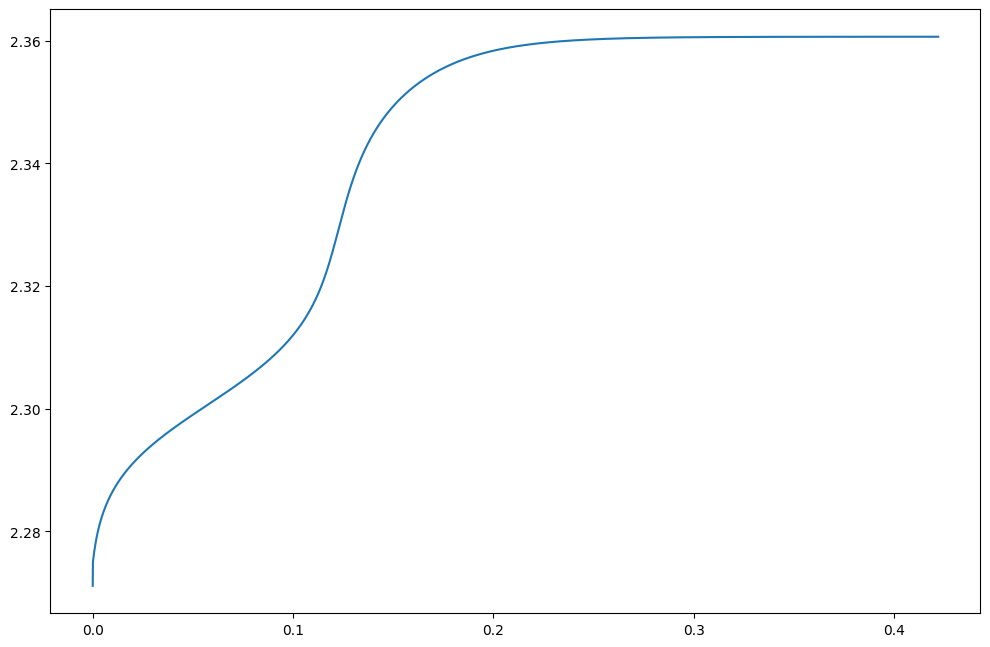

In [41]:
hours = 20
time_in_seconds = hours*3600
current = -0.0211

single_run1 = marinescu2019_charge_function(4)

Ah1 = single_run1[0]
voltage1 = single_run1[1]

plt.plot(Ah1,voltage1)

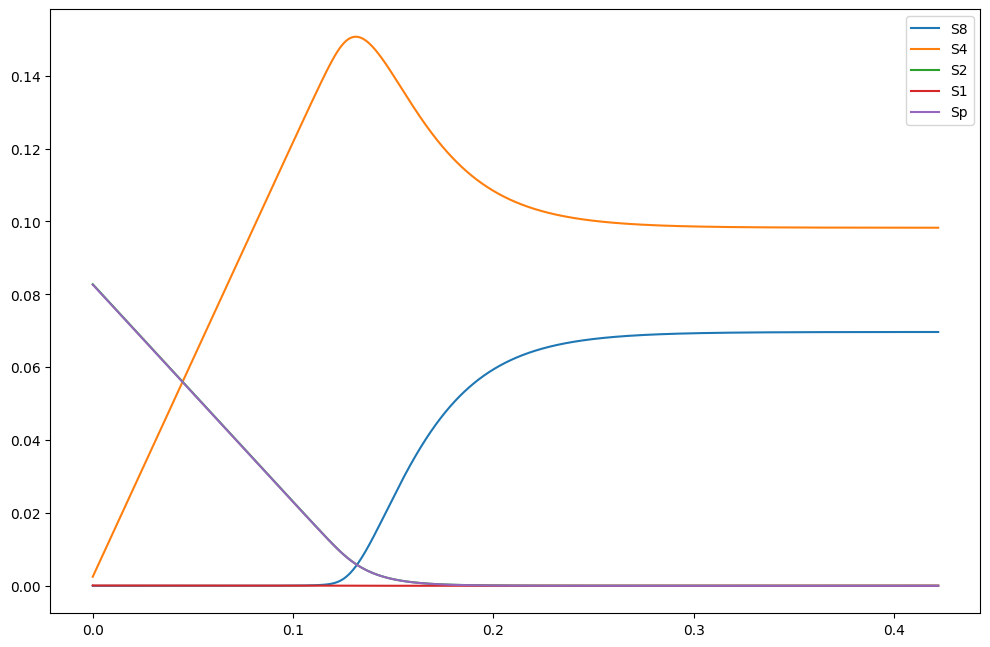

In [42]:
S8_1 = single_run1[3]
S4_1 = single_run1[4]
S2_1 = single_run1[5]
S1_1 = single_run1[6]
Sp_1 = single_run1[7]

plt.plot(Ah1,S8_1)
plt.plot(Ah1,S4_1)
plt.plot(Ah1,S2_1)
plt.plot(Ah1,S1_1)
plt.plot(Ah1,Sp_1)

plt.legend(["S8","S4","S2","S1","Sp"])

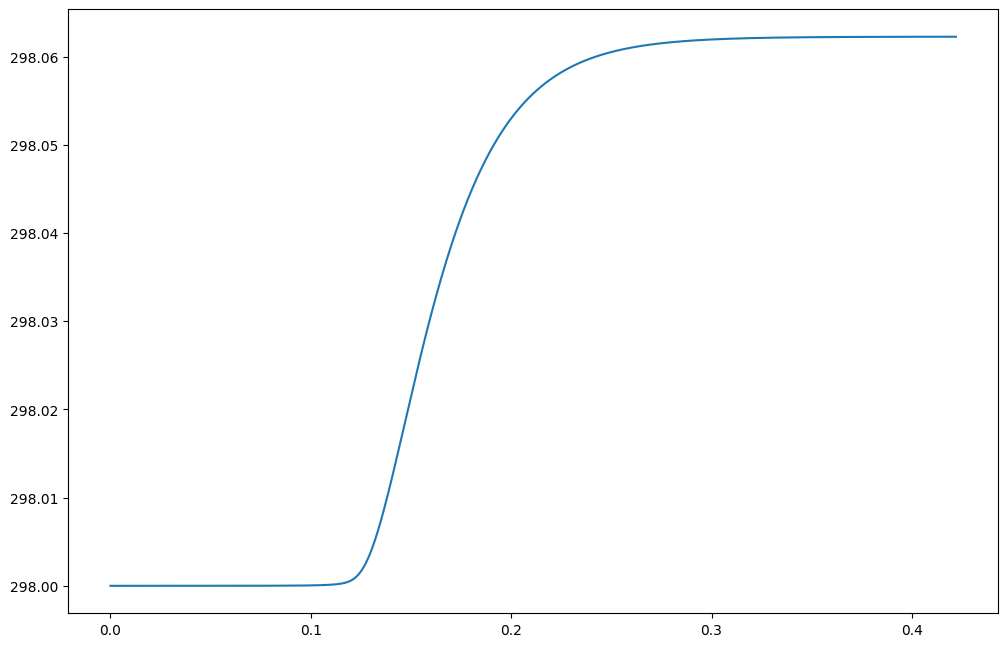

In [43]:
Tc_1 = single_run1[8]
plt.plot(Ah1,Tc_1)

In [44]:
hours = 20
time_in_seconds = hours*3600
current = -0.211

single_run2 = marinescu2019_charge_function(4)

Starting temperature 298.000000
trying time 72000.000000


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 2561.66 and h = 1.18091e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: ...

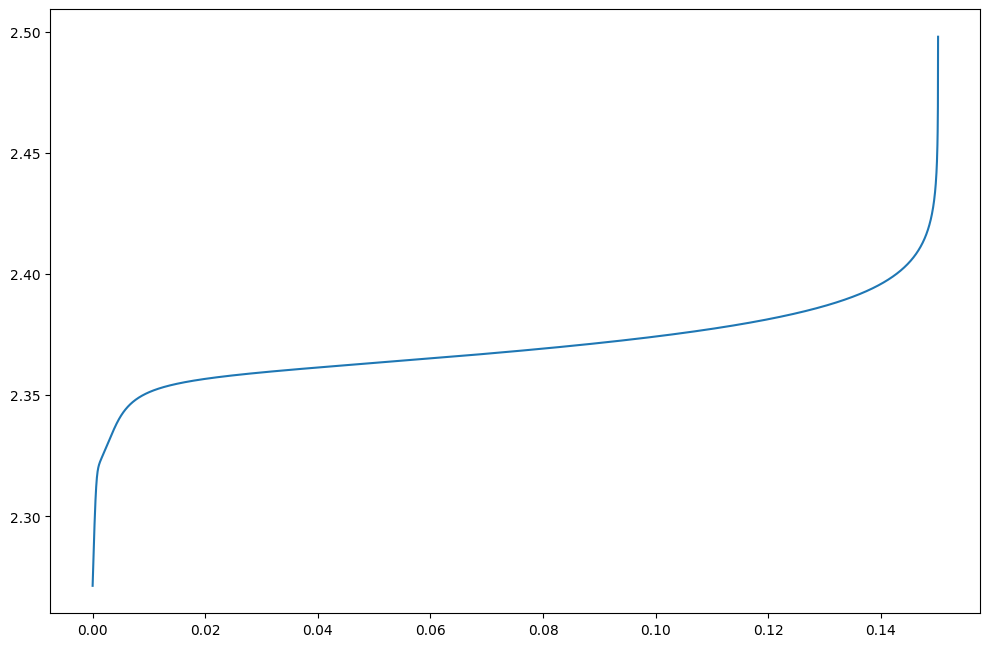

In [45]:
Ah2 = single_run2[0]
voltage2 = single_run2[1]

plt.plot(Ah2,voltage2)

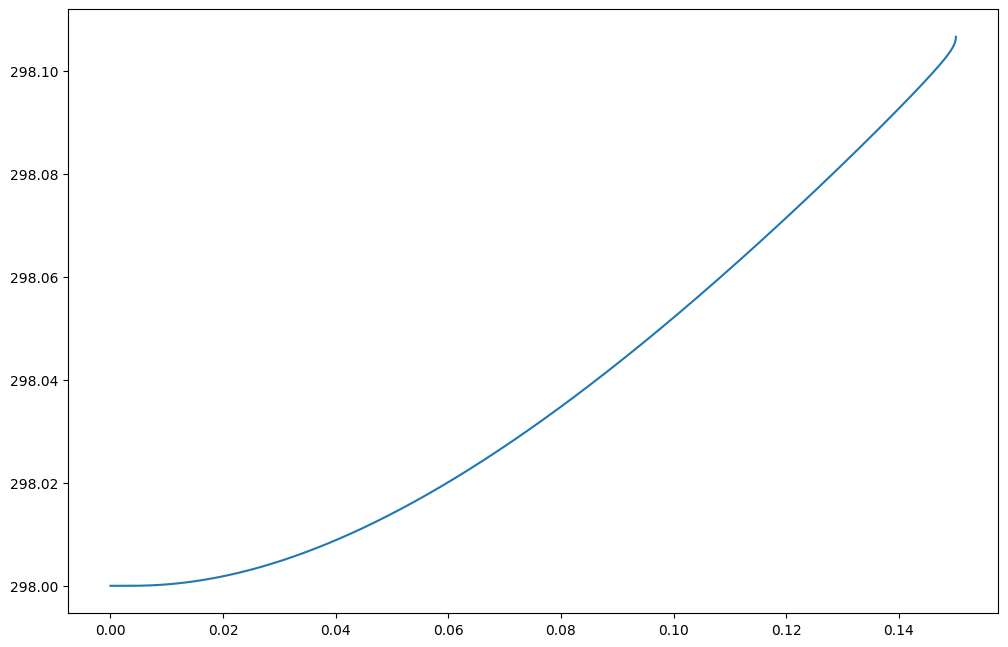

In [46]:
Tc_2 = single_run2[8]
plt.plot(Ah2,Tc_2)

In [76]:
charge_2019_data = Parallel(n_jobs=-1)(delayed(marinescu2019_charge_function)(i) for i in range(0,len(data)))

2020-12-01 11:50:47,336 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-01 11:50:47,336 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


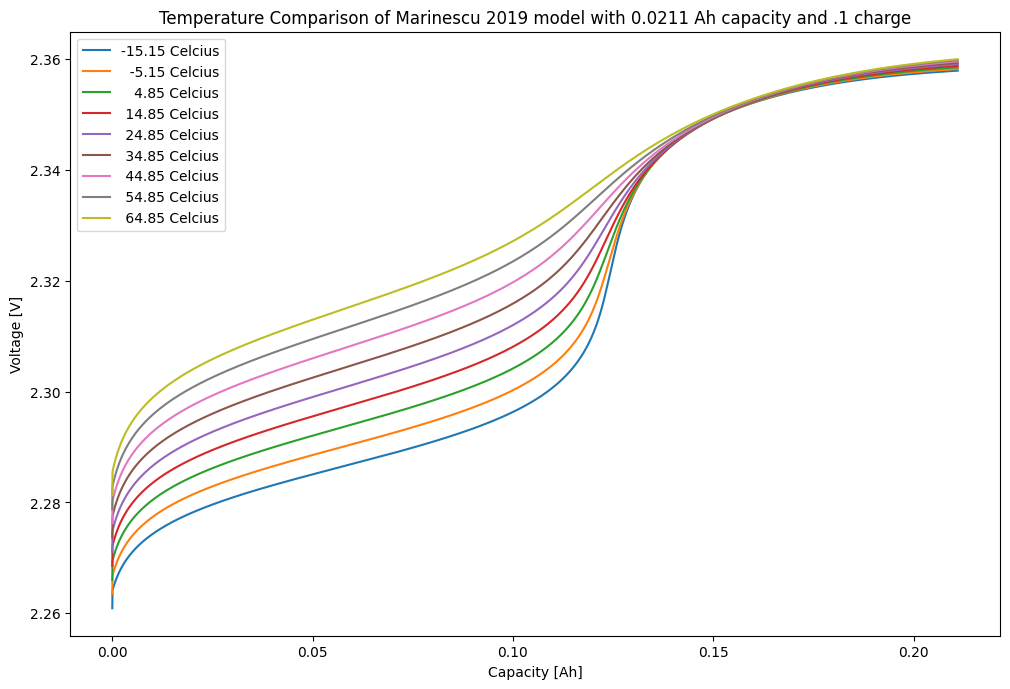

In [77]:
temp_legend = []
for sub_data in charge_2019_data:
    try:
        plt.plot(sub_data[0],sub_data[1])
        if sub_data[2] < -10:
            temp_legend.append("%2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 0:
            temp_legend.append("  %2.2f Celcius" %(sub_data[2]))
        elif sub_data[2] < 10:
            temp_legend.append("   %2.2f Celcius" %(sub_data[2]))
        else:
            temp_legend.append(" %2.2f Celcius" %(sub_data[2]))
    except:
        pass
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(temp_legend)
plt.title("Temperature Comparison of Marinescu 2019 model with 0.0211 Ah capacity and .1 charge")
plt.savefig("Marinescu 2019 Charge Temp Comparison.eps")

In [ ]:
i = 0
sub_data = data[i]
temperature = sub_data[2] + 298 - 24.85
ref = -1000
V_initial = sub_data[1][ref]
S8_initial = sub_data[3][ref]
S4_initial = sub_data[4][ref]
S2_initial = sub_data[5][ref]
S1_initial = sub_data[6][ref]
Sp_initial = sub_data[7][ref]
hours = 10
time_in_seconds = hours*3600


model = pybamm.lithium_sulfur.HuaEtAl2019()

params = model.default_parameter_values
params.update(
    {
    "Current function [A]": current,
    "Initial Condition for S8 ion [g]": S8_initial,
    "Initial Condition for S4 ion [g]": S4_initial,
    "Initial Condition for S2 ion [g]": S2_initial,
    "Initial Condition for S ion [g]": S1_initial,
    "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
    "Initial Condition for Terminal Voltage [V]": V_initial,
    "Shuttle rate coefficient during charge [s-1]": 0.0002,
    "Shuttle rate coefficient during discharge [s-1]": 0.0,
    "Reference temperature [K]" : temperature
    }
)
# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
print("Starting temperature %.0f" %(temperature))
for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
    print("trying time %.0f" %j)
    try:
        # simulate
        sim.solve(np.linspace(0, j,100000))
        # extract data
        voltage = sim.solution['Terminal voltage [V]'].entries
        Ah = -current*sim.solution.t/3600
        S8 = sim.solution["S8 [g]"].entries
        S4 = sim.solution["S4 [g]"].entries
        S2 = sim.solution["S2 [g]"].entries
        S1 = sim.solution["S [g]"].entries
        Sp = sim.solution["Precipitated Sulfur [g]"].entries
        Tc = sim.solution["Cell Temperature [K]"].entries

        break
    except:
        pass

Starting temperature 258
trying time 36000


In [ ]:
plt.plot(Tc)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 7104.89 and h

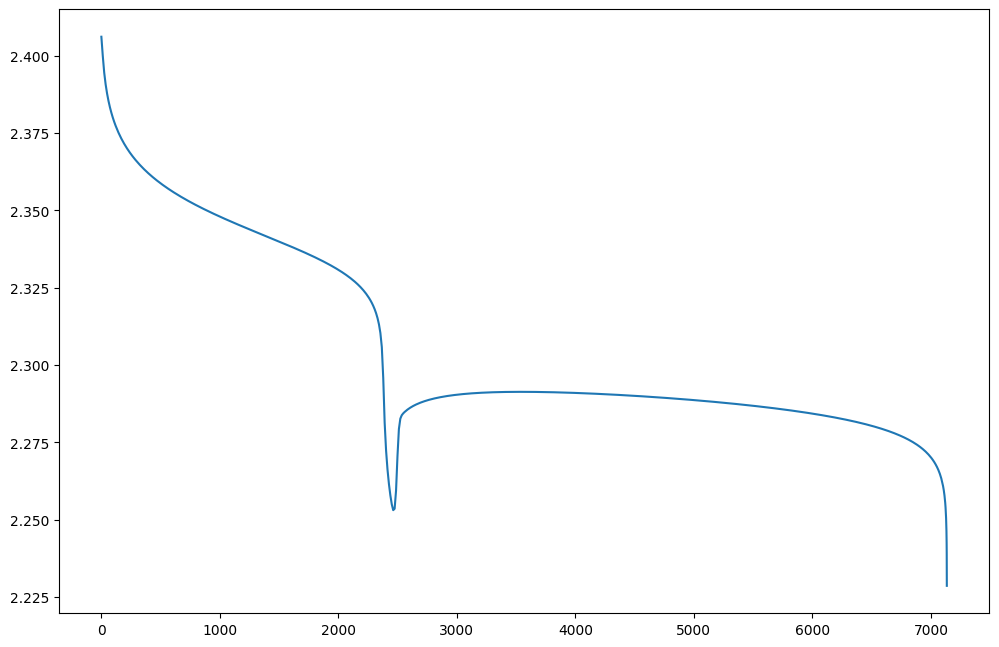

In [51]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

model = pybamm.lithium_sulfur.MarinescuEtAl2018()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for S8 ion [g]": 2.6730,
        "Initial Condition for S4 ion [g]": 0.0128,
        "Initial Condition for S2 ion [g]": 4.3321e-6,
        "Initial Condition for S ion [g]": 1.6321e-6,
        "Initial Condition for Precipitated Sulfur [g]": 2.7e-06,
        "Initial Condition for Shuttled Sulfur [g]": 0.0,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
    }
)

# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
sim.solve(np.linspace(0, 12000, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries
plt.plot(sim.solution.t, voltage)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 11024.5 and h

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 10985.9 and h

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 10996.6 and h

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Text(0, 0.5, 'Voltage [V]')

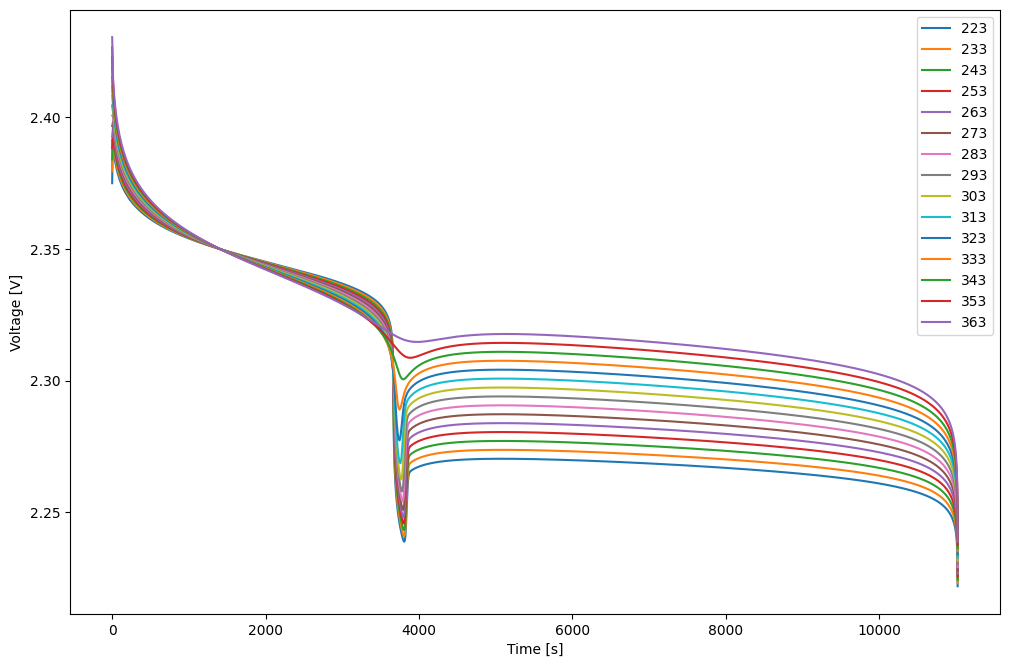

In [52]:
temp_array = []
for i in range(-5,10):
    try:
        temp = 273 + i*10
        temp_array.append(temp)
        model_hot = pybamm.lithium_sulfur.MarinescuEtAl2018()

        # Update current and ICs to correspond to initial 2.4V as in ref [2]
        params_hot = model_hot.default_parameter_values
        params_hot.update(
            {
            "Current function [A]": 1.1,
            "Initial Condition for S8 ion [g]": 2.6730,
            "Initial Condition for S4 ion [g]": 0.0128,
            "Initial Condition for S2 ion [g]": 4.3321e-6,
            "Initial Condition for S ion [g]": 1.6321e-6,
            "Initial Condition for Precipitated Sulfur [g]": 2.7e-06,
            "Initial Condition for Shuttled Sulfur [g]": 0.0,
            "Initial Condition for Terminal Voltage [V]": 2.4,
            "Shuttle rate coefficient during charge [s-1]": 0.0002,
            "Shuttle rate coefficient during discharge [s-1]": 0.0,
            "Reference temperature [K]" : temp
            }
        )
        # Set up and solve simulation
        sim_hot = pybamm.Simulation(
            model_hot,
            parameter_values=params_hot,
            solver=pybamm.CasadiSolver(
                atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
            ),
        )
        for j in [12000,11900,11800,11700,11600]:
            try:
                sim_hot.solve(np.linspace(0, j,1000))
                voltage_hot = sim_hot.solution['Terminal voltage [V]'].entries
                plt.plot(sim_hot.solution.t, voltage_hot)
                break
            except:
                pass
    except:
        pass
plt.legend(temp_array)
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 7100.89 and h

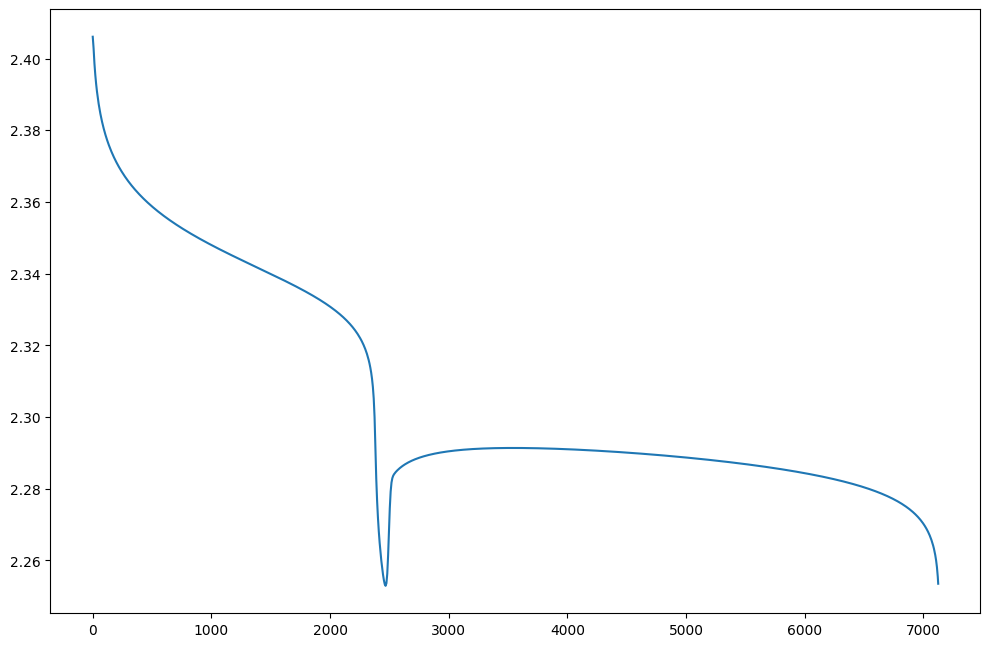

In [18]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

model_hua = pybamm.lithium_sulfur.HuaEtAl2019()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
params_hua = model_hua.default_parameter_values
params_hua.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for S8 ion [g]": 2.6730,
        "Initial Condition for S4 ion [g]": 0.0128,
        "Initial Condition for S2 ion [g]": 4.3321e-6,
        "Initial Condition for S ion [g]": 1.6321e-6,
        "Initial Condition for Precipitated Sulfur [g]": 2.7e-06,
        "Initial Condition for Shuttled Sulfur [g]": 0.0,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
    }
)

# Set up and solve simulation
sim_hua = pybamm.Simulation(
    model_hua,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
sim_hua.solve(np.linspace(0, 7124, 1000))
voltage_hua = sim_hua.solution['Terminal voltage [V]'].entries
plt.plot(sim_hua.solution.t, voltage_hua)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 7100.89 and h

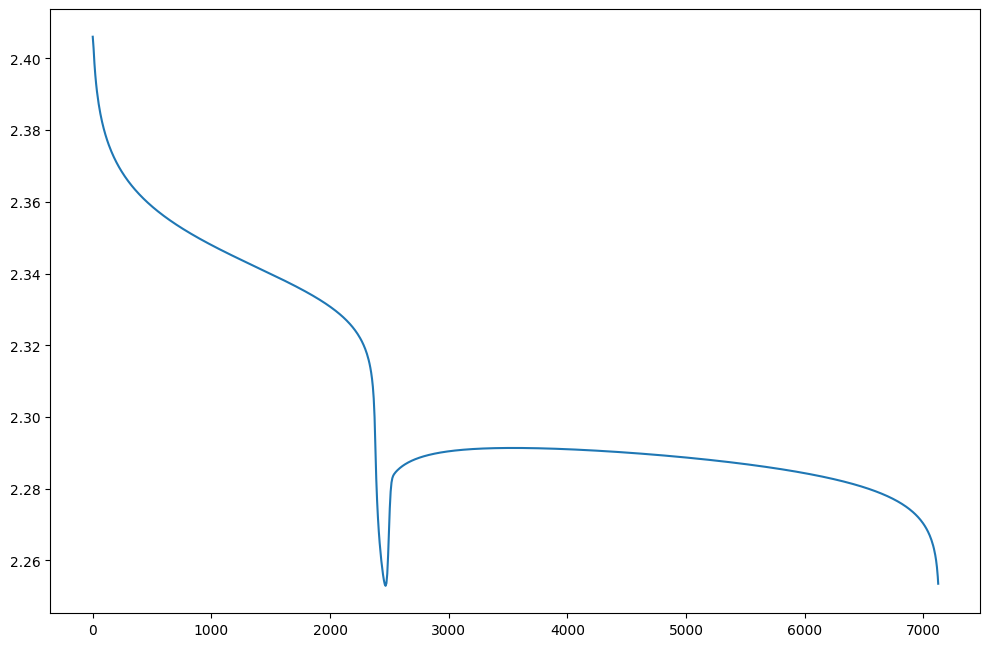

In [15]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for S8 ion [g]": 2.6730,
        "Initial Condition for S4 ion [g]": 0.0128,
        "Initial Condition for S2 ion [g]": 4.3321e-6,
        "Initial Condition for S ion [g]": 1.6321e-6,
        "Initial Condition for Precipitated Sulfur [g]": 2.7e-06,
        "Initial Condition for Shuttled Sulfur [g]": 0.0,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
    }
)

# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
sim.solve(np.linspace(0, 7124, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries
plt.plot(sim.solution.t, voltage)

In [20]:
print(max(voltage - voltage_hua))
print(min(voltage - voltage_hua))

0.0
0.0


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

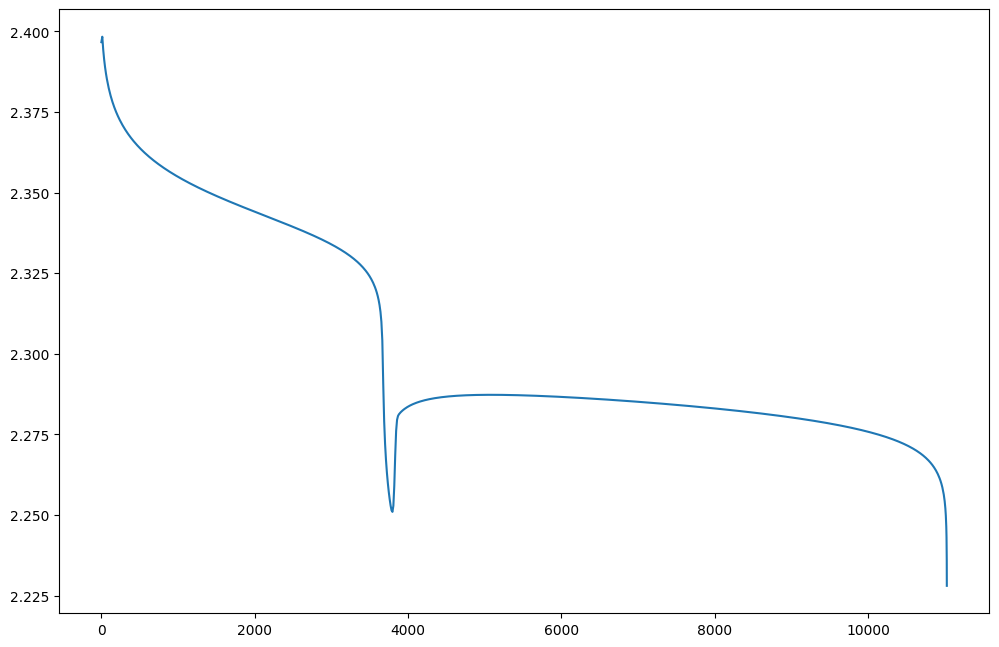

In [2]:
# initial conditions for charge

model = pybamm.lithium_sulfur.MarinescuEtAl2016()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": 1.1,
        "Initial Condition for S8 ion [g]": 2.6730,
        "Initial Condition for S4 ion [g]": 0.0128,
        "Initial Condition for S2 ion [g]": 4.3321e-6,
        "Initial Condition for S ion [g]": 1.6321e-6,
        "Initial Condition for Precipitated Sulfur [g]": 2.7e-06,
        "Initial Condition for Shuttled Sulfur [g]": 0.0,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : 273
    }
)

# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)
sim.solve(np.linspace(0, 12000, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries
plt.plot(sim.solution.t, voltage)

In [3]:
S8 = sim.solution["S8 [g]"].entries
S4 = sim.solution["S4 [g]"].entries
S2 = sim.solution["S2 [g]"].entries
Sp = sim.solution["Precipitated Sulfur [g]"].entries
S = sim.solution["S [g]"].entries
V = sim.solution["Terminal voltage [V]"].entries

In [4]:
value = -4
V[value]

2.2387028630891836

In [5]:
S8_initial_charge = S8[value]
S4_initial_charge = S4[value]
S2_initial_charge = S2[value]
Sp_initial_charge = Sp[value]
S_initial_charge = S[value]
V_initial_charge = V[value]

In [6]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
current = -1.1
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial_charge,
        "Initial Condition for S4 ion [g]": S4_initial_charge,
        "Initial Condition for S2 ion [g]": S2_initial_charge,
        "Initial Condition for S ion [g]": S_initial_charge,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_charge,
        "Initial Condition for Shuttled Sulfur [g]": 0.0,
        "Initial Condition for Terminal Voltage [V]": V_initial_charge,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : 298
    }
)

# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, 14700, 2000))
voltage = sim.solution['Terminal voltage [V]'].entries

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

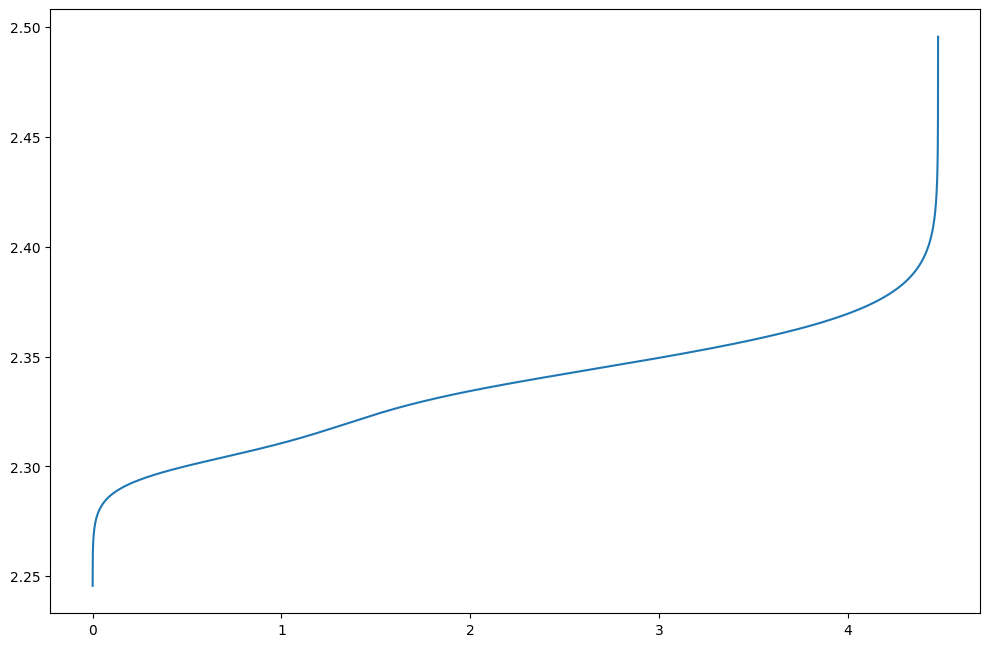

In [7]:
plt.plot(abs(current)*sim.solution.t/3600, voltage)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14505.8 and h = 9.98855e-09, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14505.8 and h = 1.19209e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14527 and h = 4.76837e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14556.8 and h = 8.87973e-13, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: ...

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.026909 and 

Text(0, 0.5, 'Voltage [V]')

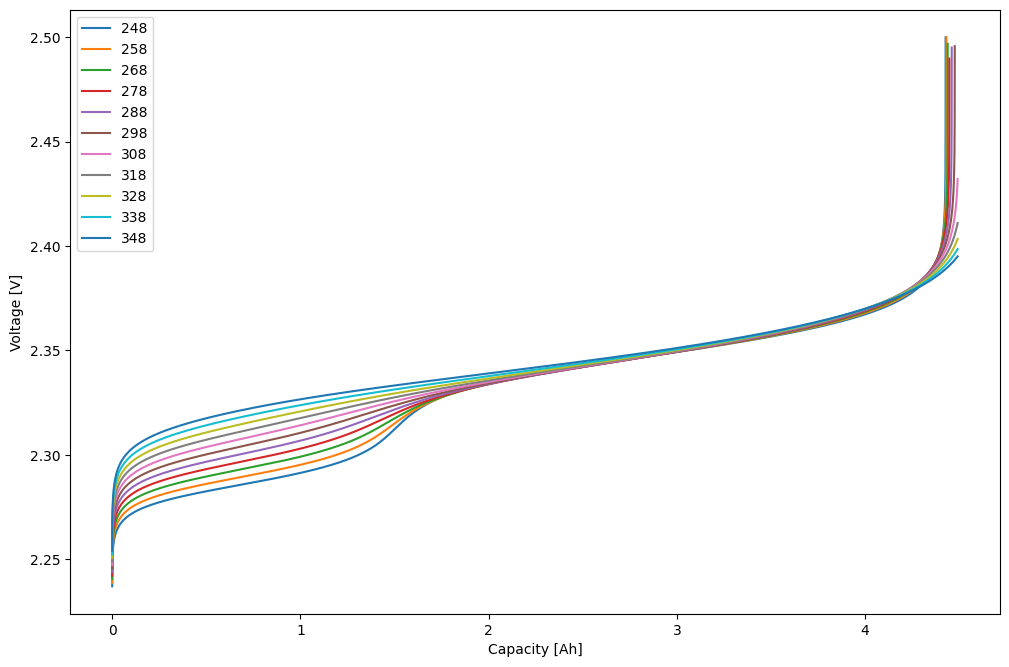

In [8]:
temp_array = []
current = -1.1
for i in range(-5,6):
    try:
        temp = 298 + i*10
        temp_array.append(temp)
        model = pybamm.lithium_sulfur.MarinescuEtAl2016()

        # Update current and ICs to correspond to initial 2.4V as in ref [2]
        current = -1.1
        params = model.default_parameter_values
        params.update(
            {
                "Current function [A]": current,
                "Initial Condition for S8 ion [g]": S8_initial_charge,
                "Initial Condition for S4 ion [g]": S4_initial_charge,
                "Initial Condition for S2 ion [g]": S2_initial_charge,
                "Initial Condition for S ion [g]": S_initial_charge,
                "Initial Condition for Precipitated Sulfur [g]": Sp_initial_charge,
                "Initial Condition for Shuttled Sulfur [g]": 0.0,
                "Initial Condition for Terminal Voltage [V]": V_initial_charge,
                "Shuttle rate coefficient during charge [s-1]": 0.0002,
                "Shuttle rate coefficient during discharge [s-1]": 0.0,
                "Reference temperature [K]" : temp
            }
        )

        # Set up and solve simulation
        sim = pybamm.Simulation(
            model,
            parameter_values=params,
            solver=pybamm.CasadiSolver(
                atol=1e-6, 
                rtol=1e-3, 
                extra_options_setup={"max_step_size": 0.1}, 
                max_step_decrease_count = 15
            ),
        )
        numerical_failure = True
        j = 14800
        while numerical_failure:
            j -= 100
            try:
                sim.solve(np.linspace(0, j,2000))
                voltage = sim.solution['Terminal voltage [V]'].entries
                plt.plot(abs(current)*sim.solution.t/3600, voltage)
                numerical_failure = False
            except:
                pass
    except:
        pass
plt.legend(temp_array)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

In [10]:
model = pybamm.lithium_sulfur.MarinescuEtAl2018()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
current = -1.1
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial_charge,
        "Initial Condition for S4 ion [g]": S4_initial_charge,
        "Initial Condition for S2 ion [g]": S2_initial_charge,
        "Initial Condition for S ion [g]": S_initial_charge,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_charge,
        "Initial Condition for Shuttled Sulfur [g]": 0.0,
        "Initial Condition for Terminal Voltage [V]": V_initial_charge,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : 298
    }
)

# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, 14700, 2000))
voltage = sim.solution['Terminal voltage [V]'].entries

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

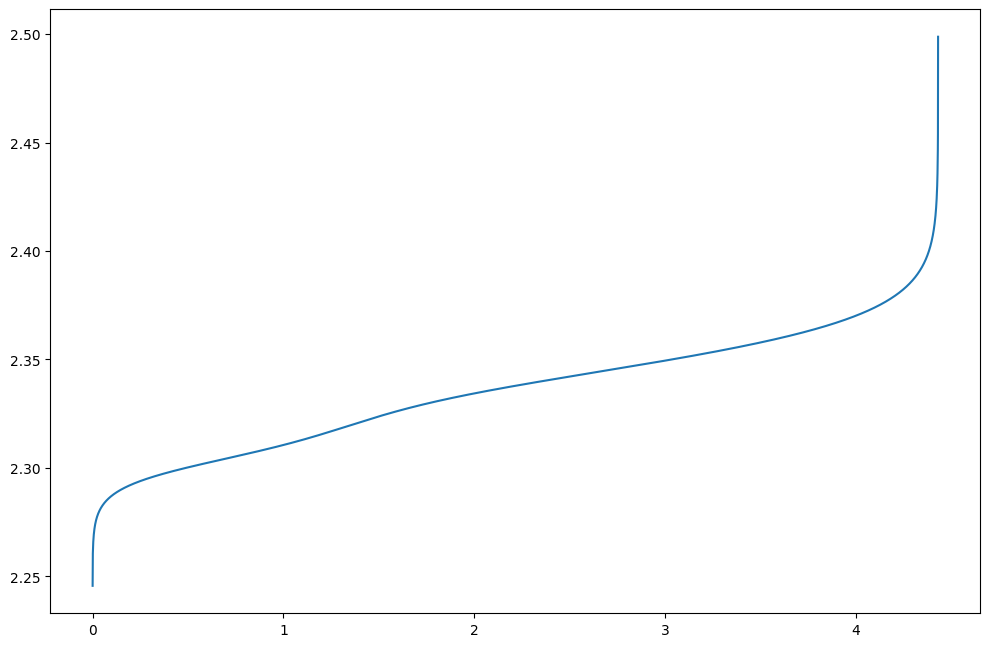

In [11]:
plt.plot(abs(current)*sim.solution.t/3600, voltage)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14369.1 and h = 2.06046e-09, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14369.1 and h = 1.05803e-11, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14369.1 and h = 6.58451e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: ...

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14388.1 and h = 1.86265e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: ...

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14414.9 and h = 5.82077e-12, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: ...

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14451 and h = 1.24508e-11, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 14558.4 and h = 7.45058e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: ...

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Text(0, 0.5, 'Voltage [V]')

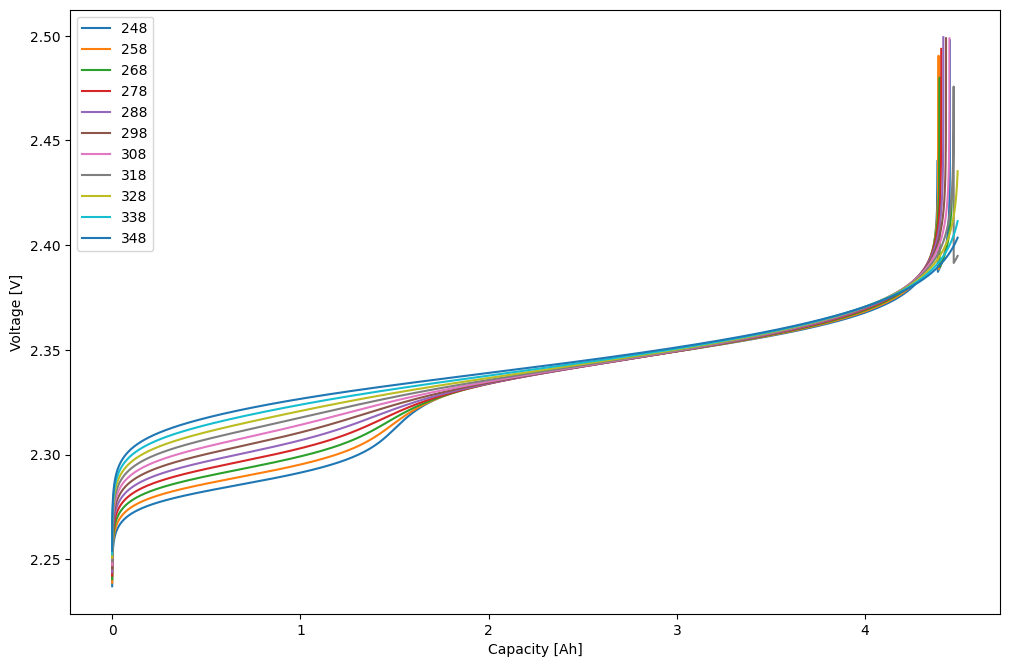

In [12]:
temp_array = []
current = -1.1
for i in range(-5,6):
    try:
        temp = 298 + i*10
        temp_array.append(temp)
        model = pybamm.lithium_sulfur.MarinescuEtAl2018()

        # Update current and ICs to correspond to initial 2.4V as in ref [2]
        current = -1.1
        params = model.default_parameter_values
        params.update(
            {
                "Current function [A]": current,
                "Initial Condition for S8 ion [g]": S8_initial_charge,
                "Initial Condition for S4 ion [g]": S4_initial_charge,
                "Initial Condition for S2 ion [g]": S2_initial_charge,
                "Initial Condition for S ion [g]": S_initial_charge,
                "Initial Condition for Precipitated Sulfur [g]": Sp_initial_charge,
                "Initial Condition for Shuttled Sulfur [g]": 0.0,
                "Initial Condition for Terminal Voltage [V]": V_initial_charge,
                "Shuttle rate coefficient during charge [s-1]": 0.0002,
                "Shuttle rate coefficient during discharge [s-1]": 0.0,
                "Reference temperature [K]" : temp
            }
        )

        # Set up and solve simulation
        sim = pybamm.Simulation(
            model,
            parameter_values=params,
            solver=pybamm.CasadiSolver(
                atol=1e-6, 
                rtol=1e-3, 
                extra_options_setup={"max_step_size": 0.1}, 
                max_step_decrease_count = 15
            ),
        )
        numerical_failure = True
        j = 14800
        while numerical_failure:
            j -= 100
            try:
                sim.solve(np.linspace(0, j,2000))
                voltage = sim.solution['Terminal voltage [V]'].entries
                plt.plot(abs(current)*sim.solution.t/3600, voltage)
                numerical_failure = False
            except:
                pass
    except:
        pass
plt.legend(temp_array)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

In [14]:
model = pybamm.lithium_sulfur.HuaEtAl2019()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
current = -1.1
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial_charge,
        "Initial Condition for S4 ion [g]": S4_initial_charge,
        "Initial Condition for S2 ion [g]": S2_initial_charge,
        "Initial Condition for S ion [g]": S_initial_charge,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_charge,
        "Initial Condition for Shuttled Sulfur [g]": 0.0,
        "Initial Condition for Terminal Voltage [V]": V_initial_charge,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference temperature [K]" : 348
    }
)

# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, 17500, 100))
voltage = sim.solution['Terminal voltage [V]'].entries

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

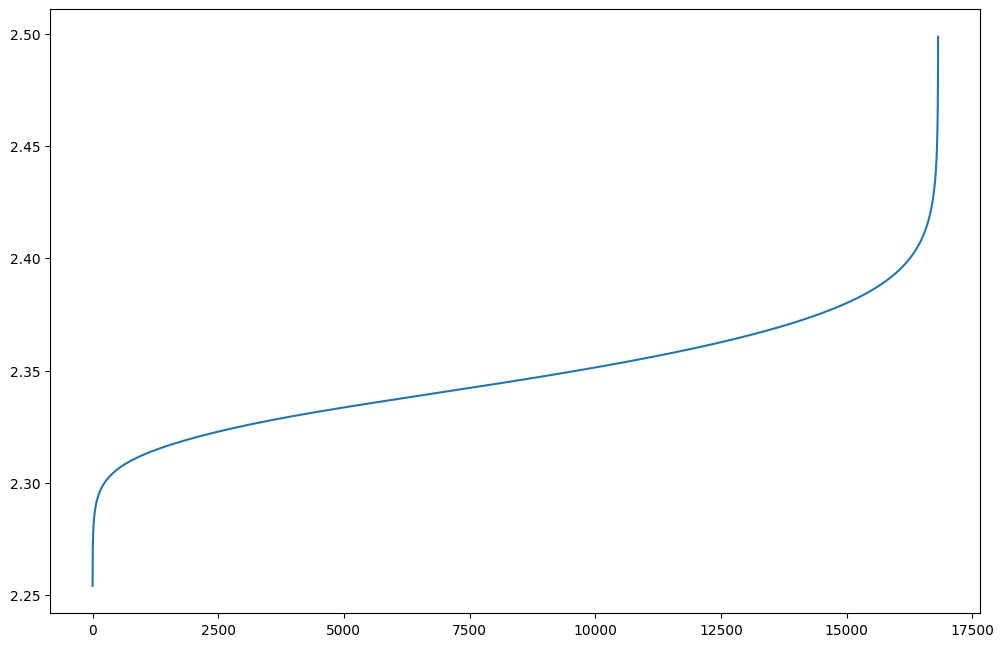

In [15]:
plt.plot(sim.solution.t, voltage)

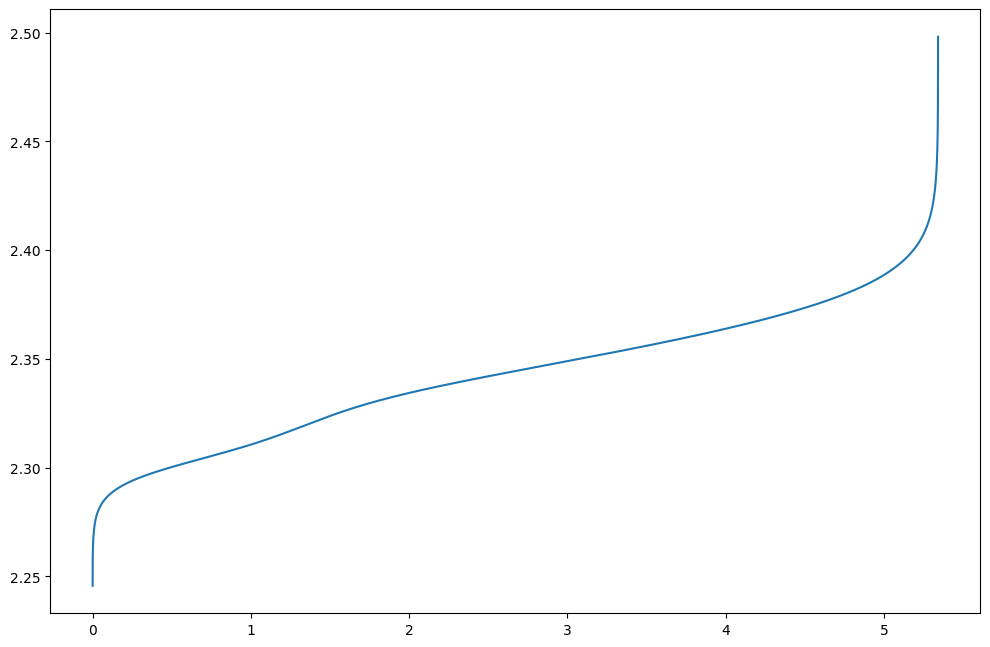

In [24]:
plt.plot(abs(current)*sim.solution.t/3600, voltage)

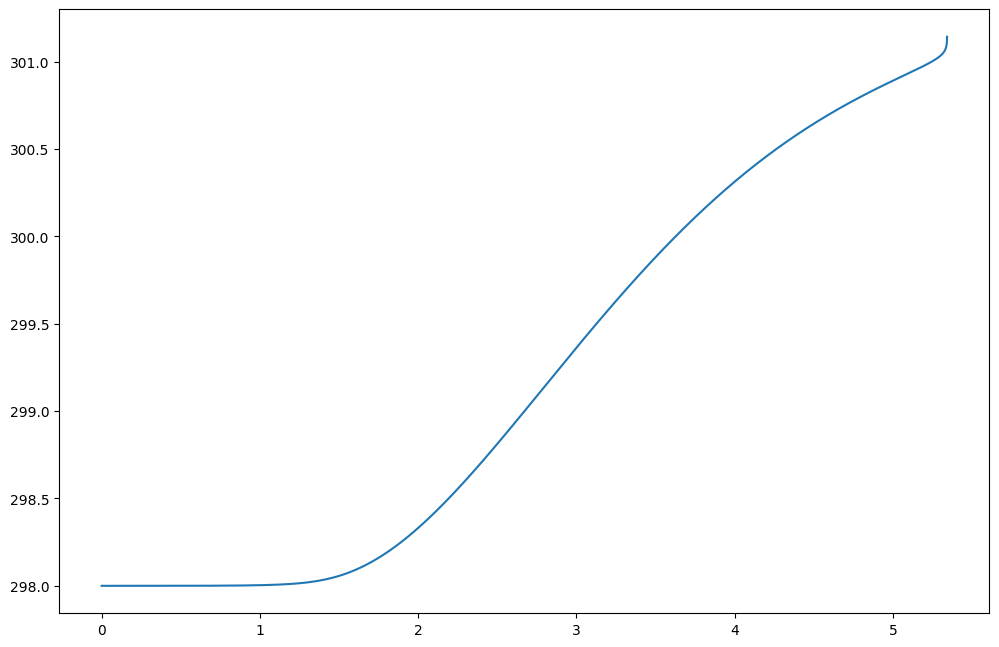

In [25]:
cell_temp = sim.solution['Cell Temperature [K]'].entries
plt.plot(abs(current)*sim.solution.t/3600, cell_temp)

Attempting temperature 248 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00287707 an

Attempting temperature 258 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Attempting temperature 268 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Attempting temperature 278 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Attempting temperature 288 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Attempting temperature 298 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Attempting temperature 308 K with time 17500 seconds
Attempting temperature 318 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Attempting temperature 328 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

At t = 16854.4 and h = 5.84181e-08, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 16850.8 and h = 6.16414e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .

Attempting temperature 338 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 16814.8 and h = 1.19209e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 16814.5 and h = 1.85561e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 16814.9 and h = 4.42771e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed:

Attempting temperature 348 K with time 17500 seconds


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Text(0, 0.5, 'Voltage [V]')

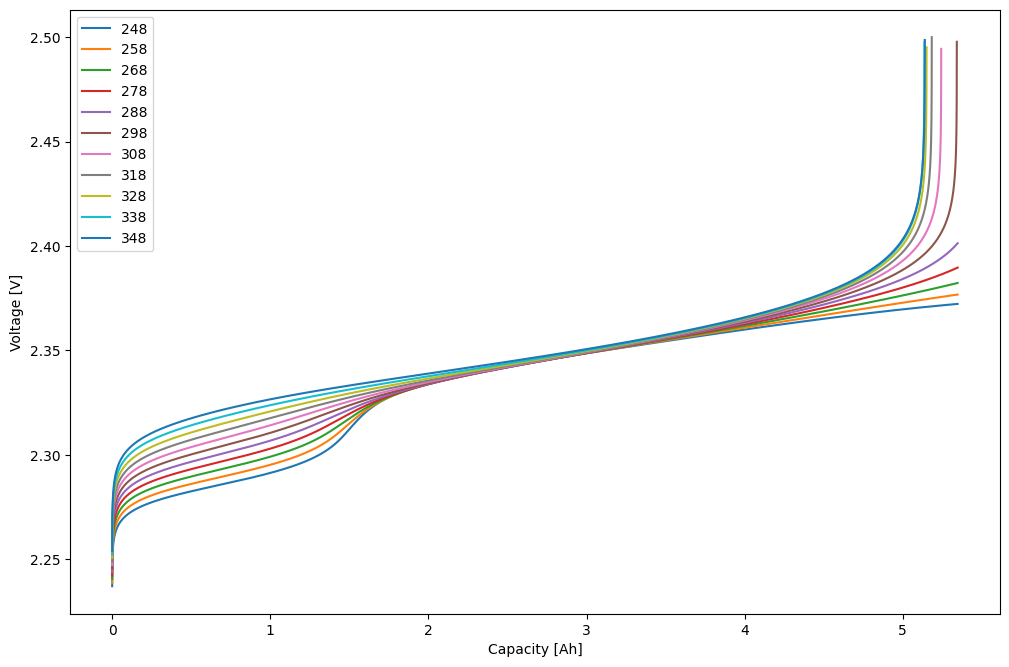

In [7]:
temp_array = []
current = -1.1
for i in range(-5,6):
    try:
        temp = 298 + i*10
        temp_array.append(temp)
        model = pybamm.lithium_sulfur.HuaEtAl2019()

        # Update current and ICs to correspond to initial 2.4V as in ref [2]
        current = -1.1
        params = model.default_parameter_values
        params.update(
            {
                "Current function [A]": current,
                "Intitial Condition for Li [g]" : 1.1e3
                "Initial Condition for Precipitated S [g]": 6.7e3,
                "Initial Condition for S8 ion [g]": 1e2,
                "Initial Condition for S6 ion [g]": 8.2,
                "Initial Condition for S4 ion [g]": 5.6e-3,
                "Initial Condition for S2 ion [g]": 8e-6,
                "Initial Condition for S ion [g]": 1.4e-8,
                "Initial Condition for Terminal Voltage [V]": param.E02 + param.eta2,
                "Reference temperature [K]" : temp
            }
        )

        # Set up and solve simulation
        sim = pybamm.Simulation(
            model,
            parameter_values=params,
            solver=pybamm.CasadiSolver(
                atol=1e-6, 
                rtol=1e-3, 
                extra_options_setup={"max_step_size": 0.1}, 
                max_step_decrease_count = 15
            ),
        )
        numerical_failure = True
        j = 17600
        while numerical_failure:
            j -= 100
            try:
                print("Attempting temperature {} K with time {} seconds".format(temp, j))
                sim.solve(np.linspace(0, j,100))
                voltage = sim.solution['Terminal voltage [V]'].entries
                plt.plot(abs(current)*sim.solution.t/3600, voltage)
                numerical_failure = False
            except:
                pass
    except:
        pass
plt.legend(temp_array)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

In [ ]:
# the above potentially passed over temp = 308
# Seems stuck on temp = 318

In [2]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


model = pybamm.lithium_sulfur.ZhangEtAl2015()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
current = 1
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Precipitation rate [s-1]": 1.5e-5,
        "Reference temperature [K]" : 298
    }
)

# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.01}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, 1000, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


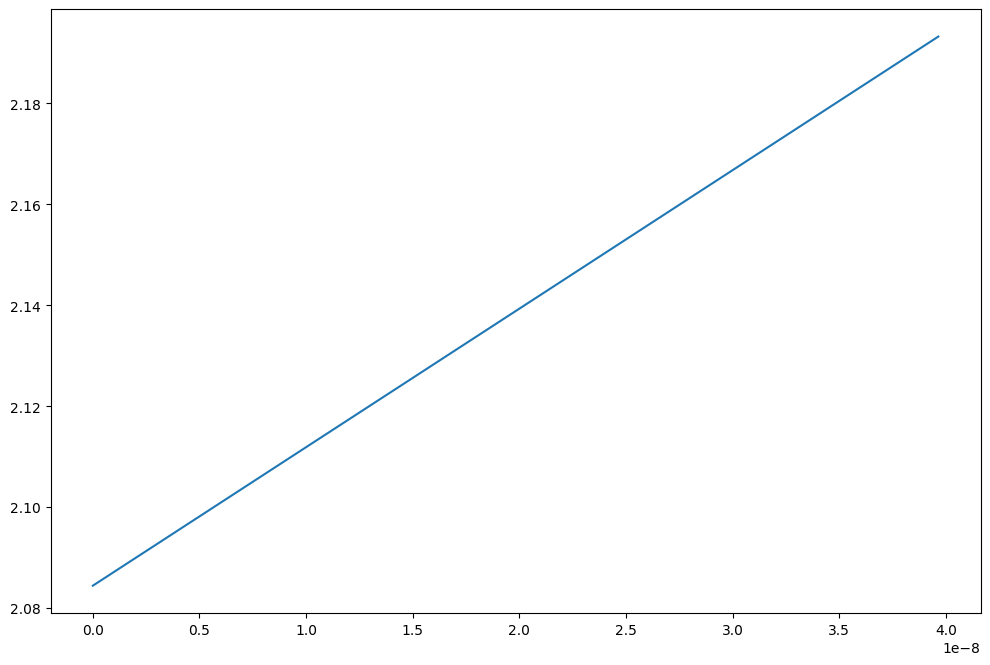

In [3]:
plt.plot(abs(current)*sim.solution.t/3600, voltage)

In [4]:
sim.solution['Reaction 2 potential [V]'].entries

array([2.35557727, 2.35557508])